### 📈 Race Pace Overview

This section analyzes driver performance by converting lap times into seconds and calculating statistics like mean, median, and best laps.  
It helps identify who had the most consistent pace and who delivered standout laps during the race.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
import sys
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1')
from delta_time_sector_constrained import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
import os
import sys

In [4]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(color_scheme='fastf1')


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Budapest Grand Prix', 'R')
session.load()
# Get only drivers who finished the race
results = session.results
# Exclude drivers who Retired, Did Not Start, or Did Not Finish
excluded_statuses = ['Retired', 'Did not start', 'Did not finish']

# Keep only drivers who have a clean status (finished the race)
finished_drivers = results[~results['Status'].isin(excluded_statuses)]['Abbreviation'].tolist()

# Get all laps, excluding box laps and inaccurate laps
laps = session.laps.pick_wo_box()
laps = laps[laps['IsAccurate'] == True]

# Filter only laps from drivers who finished the race
laps = laps[laps['Driver'].isin(finished_drivers)]

# Get circuit info (unchanged)
circuit_info = session.get_circuit_info()

weather = session.weather_data




req         WARNING 	DEFAULT CACHE ENABLED! (2.47 GB) /Users/PietroPaolo/Library/Caches/fastf1


core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '14', '5', '18', '30', '1', '12', '6', '44', '27', '55', '23', '31', '22', '43', '10', '87']


In [5]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 01:00:42.304000,NOR,4,0 days 00:01:23.964000,2.0,1.0,NaT,NaT,0 days 00:00:30.209000,0 days 00:00:30.346000,...,True,McLaren,0 days 00:59:18.340000,2025-08-03 13:04:36.434,1,5.0,False,,False,True
2,0 days 01:02:05.527000,NOR,4,0 days 00:01:23.223000,3.0,1.0,NaT,NaT,0 days 00:00:29.792000,0 days 00:00:30.097000,...,True,McLaren,0 days 01:00:42.304000,2025-08-03 13:06:00.398,1,4.0,False,,False,True
3,0 days 01:03:28.404000,NOR,4,0 days 00:01:22.877000,4.0,1.0,NaT,NaT,0 days 00:00:30.125000,0 days 00:00:29.665000,...,True,McLaren,0 days 01:02:05.527000,2025-08-03 13:07:23.621,1,4.0,False,,False,True
4,0 days 01:04:51.043000,NOR,4,0 days 00:01:22.639000,5.0,1.0,NaT,NaT,0 days 00:00:29.930000,0 days 00:00:29.672000,...,True,McLaren,0 days 01:03:28.404000,2025-08-03 13:08:46.498,1,4.0,False,,False,True
5,0 days 01:06:13.224000,NOR,4,0 days 00:01:22.181000,6.0,1.0,NaT,NaT,0 days 00:00:29.880000,0 days 00:00:29.313000,...,True,McLaren,0 days 01:04:51.043000,2025-08-03 13:10:09.137,1,4.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,0 days 02:28:24.456000,GAS,10,0 days 00:01:22.529000,65.0,2.0,NaT,NaT,0 days 00:00:29.503000,0 days 00:00:29.686000,...,True,Alpine,0 days 02:27:01.927000,2025-08-03 14:32:20.021,1,17.0,False,,False,True
1316,0 days 02:29:47.131000,GAS,10,0 days 00:01:22.675000,66.0,2.0,NaT,NaT,0 days 00:00:29.568000,0 days 00:00:29.704000,...,True,Alpine,0 days 02:28:24.456000,2025-08-03 14:33:42.550,1,17.0,False,,False,True
1317,0 days 02:31:09.838000,GAS,10,0 days 00:01:22.707000,67.0,2.0,NaT,NaT,0 days 00:00:29.445000,0 days 00:00:29.799000,...,True,Alpine,0 days 02:29:47.131000,2025-08-03 14:35:05.225,1,17.0,False,,False,True
1318,0 days 02:32:32.501000,GAS,10,0 days 00:01:22.663000,68.0,2.0,NaT,NaT,0 days 00:00:29.448000,0 days 00:00:29.739000,...,True,Alpine,0 days 02:31:09.838000,2025-08-03 14:36:27.932,1,17.0,False,,False,True


In [6]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [7]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.

    Parameters:
    - td: pd.Timedelta

    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [8]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)


# Manually assign official or visually appropriate colors to each team
TEAM_COLORS = {
    'McLaren': '#FF8700',         # Papaya
    'Ferrari': '#DC0000',         # Classic red
    'Red Bull Racing': '#1E41FF', # Deep blue
    'Mercedes': '#00D2BE',        # Teal
    'Williams': '#005AFF',        # Royal blue
    'Racing Bulls': '#6692FF',    # Light blue
    'Kick Sauber': '#90EE90',     # Light green
    'Alpine': '#FE86BC',          # Pinkish magenta
    'Haas F1 Team': '#B6BABD',    # Silver/gray
    'Aston Martin': '#006F62',    # Racing green
}

# Assign team colors safely
def get_team_color(team):
    team = team.strip()
    return TEAM_COLORS.get(team, '#000000')  # fallback to black

# Create the palette
team_palette = {team: get_team_color(team) for team in team_order}

In [9]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "COL": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [10]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

### 🏁 Team Performance Comparison

Teams are ranked by their median lap time across the race.  
This gives a high-level overview of overall race competitiveness, showing which teams delivered strong race setups and consistent execution.

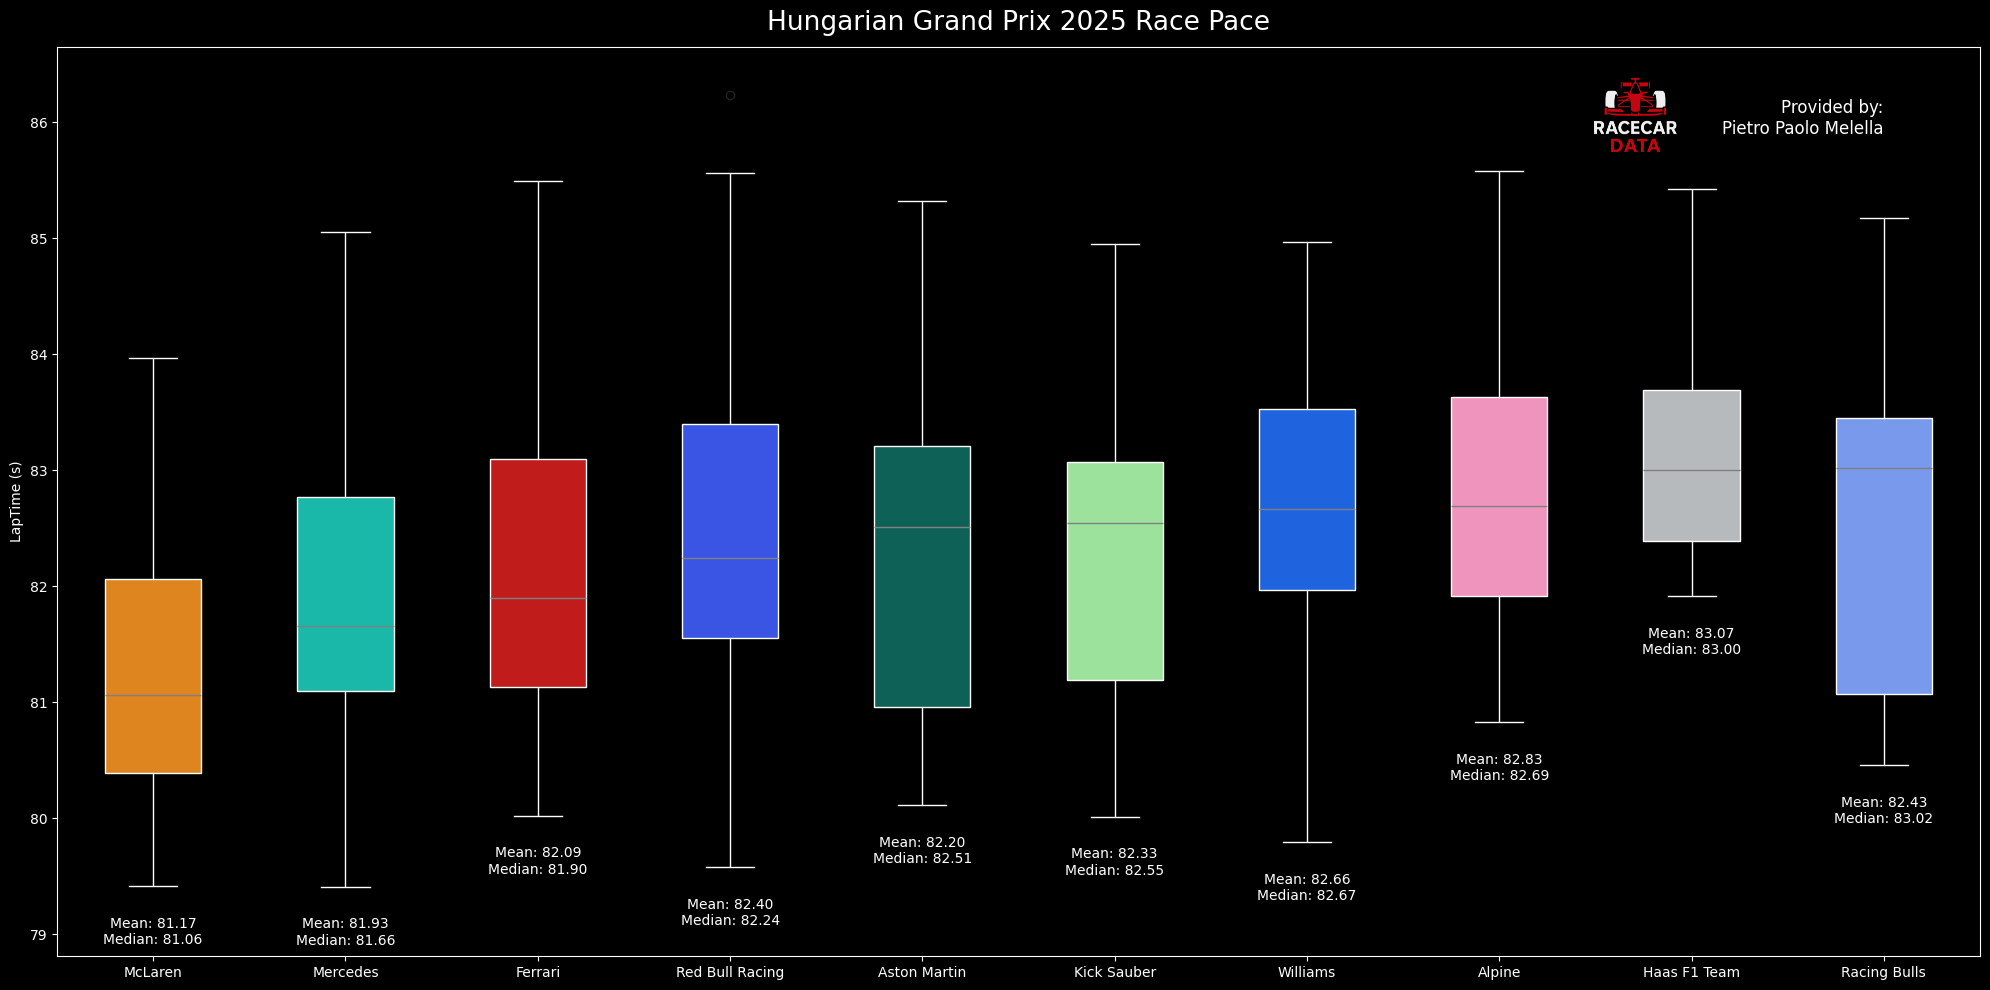

In [23]:
# First, calculate the mean and median times for each team
transformed_laps.reset_index(drop=True, inplace=True)

team_stats = transformed_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

def compute_dynamic_ylim(lap_times, group_mins,
                         lower_pct=0.05, upper_pct=0.95,
                         pad=0.5, annotation_offset=0.5,
                         max_span=10.0):
    """
    Automatic y-limits: use central percentiles + padding, cap total span,
    and ensure annotation (below group_mins) isn't clipped.
    """
    low = lap_times.quantile(lower_pct)
    high = lap_times.quantile(upper_pct)

    y_lower = low - pad
    y_upper = high + pad

    # Cap the total span so extreme regime shifts don't over-expand
    span = y_upper - y_lower
    if span > max_span:
        center = lap_times.median()
        half = max_span / 2
        y_lower = center - half
        y_upper = center + half

    # Ensure annotation below the true min is visible
    annotation_floor = group_mins.min() - annotation_offset
    if annotation_floor < y_lower:
        y_lower = annotation_floor - 0.1

    return y_lower, y_upper

y_lower, y_upper = compute_dynamic_ylim(
    transformed_laps['LapTime (s)'],
    team_stats['min'],
    lower_pct=0.0001,  # tighten or loosen if needed
    upper_pct=0.9999,
    pad=0.5,
    annotation_offset=0.5,
    max_span=10  # roughly what your manual 104–114 had
)
ax.set_ylim(y_lower, y_upper)

# Loop through the teams and add mean and median text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

# Update plot title and remove grid
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace")
plt.grid(visible=False)

# Add source text in a more readable position
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Remove redundant x-label
ax.set(xlabel=None)

# Tight layout and display
plt.tight_layout()
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.73, 0.82, 0.12, 0.12], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
else:
            print(f"[WARN] Logo file not found at: {logo_path}")
plt.show()


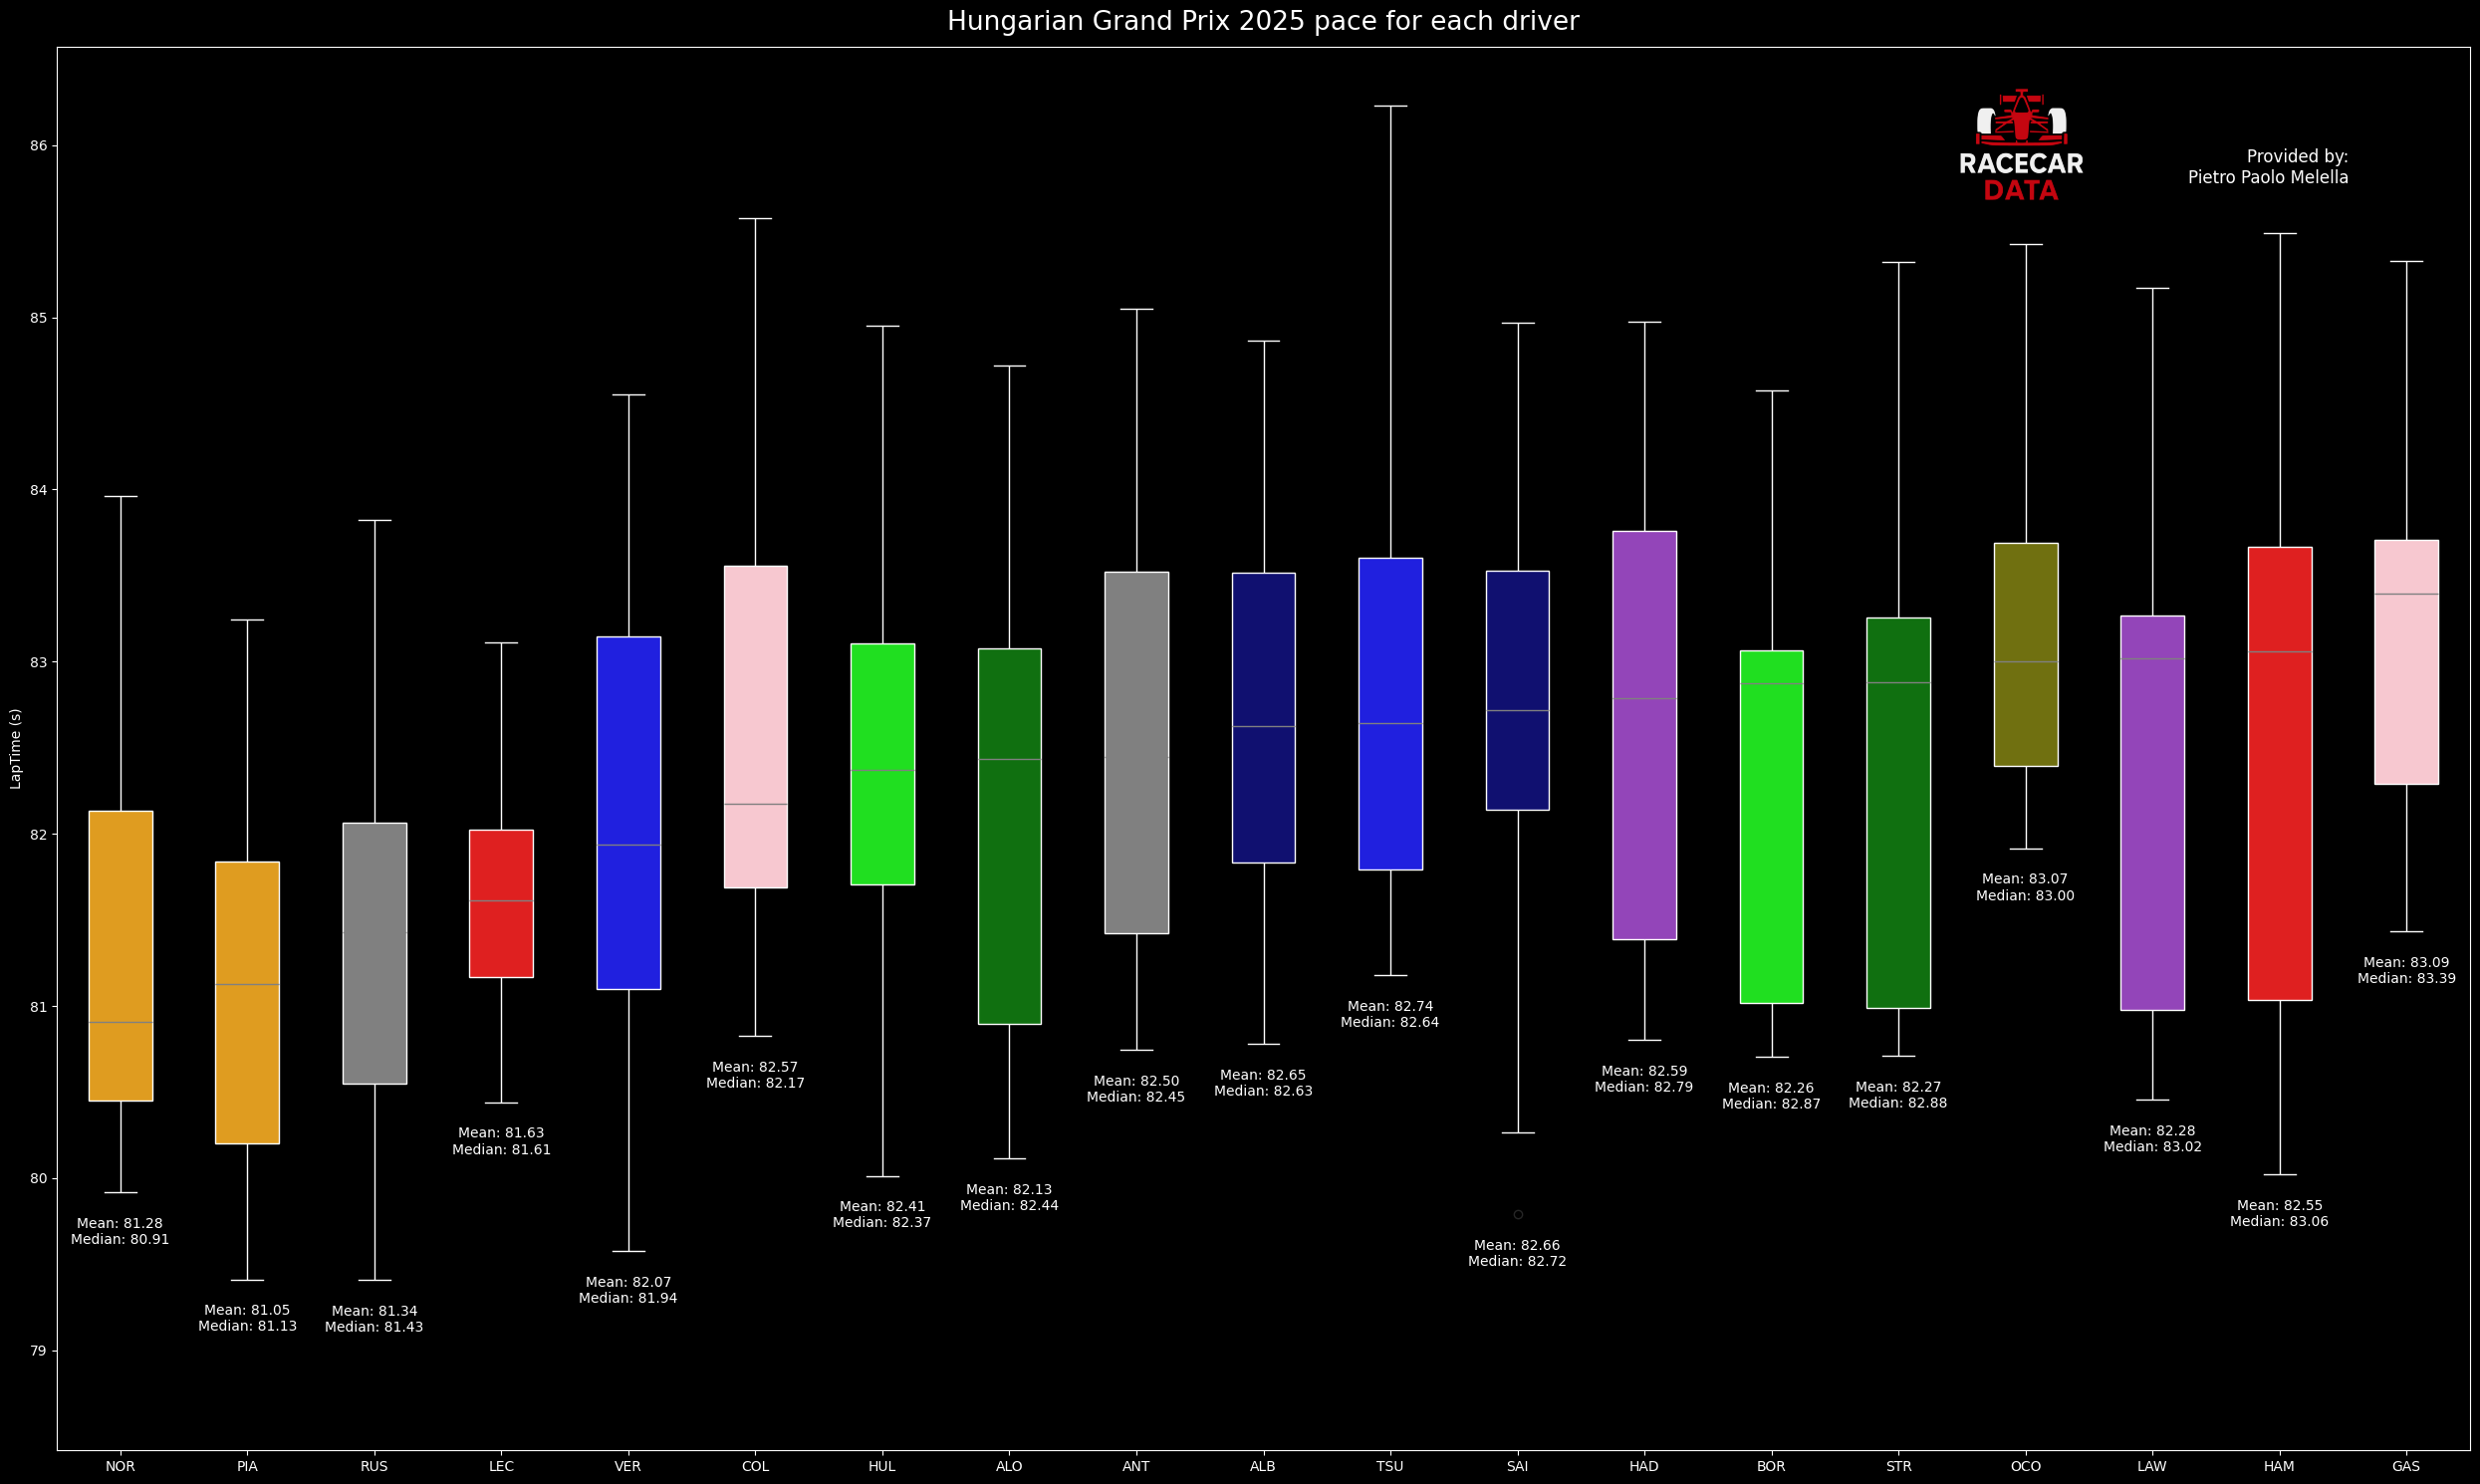

In [22]:
drivers_stats = transformed_laps.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)


# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )


plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver")
plt.grid(visible=False)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

def compute_dynamic_ylim(lap_times, group_mins,
                         lower_pct=0.05, upper_pct=0.95,
                         pad=0.5, annotation_offset=0.5,
                         max_span=10.0):
    """
    Automatic y-limits: use central percentiles + padding, cap total span,
    and ensure annotation (below group_mins) isn't clipped.
    """
    low = lap_times.quantile(lower_pct)
    high = lap_times.quantile(upper_pct)

    y_lower = low - pad
    y_upper = high + pad

    # Cap the total span so extreme regime shifts don't over-expand
    span = y_upper - y_lower
    if span > max_span:
        center = lap_times.median()
        half = max_span / 2
        y_lower = center - half
        y_upper = center + half

    # Ensure annotation below the true min is visible
    annotation_floor = group_mins.min() - annotation_offset
    if annotation_floor < y_lower:
        y_lower = annotation_floor - 0.1

    return y_lower, y_upper

y_lower, y_upper = compute_dynamic_ylim(
    transformed_laps['LapTime (s)'],
    team_stats['min'],
    lower_pct=0.001,  # tighten or loosen if needed
    upper_pct=0.999,
    pad=1,
    annotation_offset=0.5,
    max_span=10  # roughly what your manual 104–114 had
)
ax.set_ylim(y_lower, y_upper)
# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.73, 0.84, 0.12, 0.12], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
else:
            print(f"[WARN] Logo file not found at: {logo_path}")
plt.show()

In [26]:
class RacePacePlot:
    def __init__(self, laps_df, colors_dict):
        """
        Parameters:
        - laps_df (pd.DataFrame): must contain ['Driver', 'LapNumber', 'LapTime (s)', 'Team', 'Stint']
        - colors_dict (dict): maps team names to hex color strings
        """
        self.laps = laps_df.copy()
        self.colors_dict = colors_dict

    def plot(self, drivers=None, title="2025 Hungarian GP - Race Pace"):
        """
        Plot lap times for selected drivers with pit stop annotations.

        Parameters:
        - drivers (list or None): list of driver codes (e.g., ['VER', 'LEC']); plots all if None
        - title (str): title of the chart
        """
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(16, 8))

        available_drivers = self.laps['Driver'].unique()
        selected_drivers = drivers if drivers is not None else available_drivers

        for driver in selected_drivers:
            drv_laps = self.laps[self.laps['Driver'] == driver]
            if drv_laps.empty:
                continue

            team = drv_laps['Team'].iloc[0]
            color = self.colors_dict.get(team, 'white')

            # Plot lap times
            ax.plot(drv_laps['LapNumber'], drv_laps['LapTime (s)'], label=driver, color=color, linewidth=2)

            # Find pit stops based on Stint changes
            stint_changes = drv_laps['Stint'].diff().fillna(0)
            pit_laps = drv_laps[stint_changes == 1]

            for _, pit in pit_laps.iterrows():
                ax.text(pit['LapNumber'], pit['LapTime (s)'] + 0.1, 'PIT', color=color, fontsize=20)

        # Format y-axis to mm:ss
        def format_time(x, pos):
            minutes = int(x // 60)
            seconds = x % 60
            return f"{minutes}:{seconds:04.1f}"

        ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_time))
        ax.set_title(title, fontsize=20)
        ax.set_xlabel("Lap", fontsize=14)
        ax.set_ylabel("Lap Time", fontsize=14)
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.legend(title="", loc='lower left')
        
        fig.text(0.9, 0.88, "Provided by:\nPietro Paolo Melella",
             ha='right', va='bottom', color='white', fontsize=13)
        plt.tight_layout()
        sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
        logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

        if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.65, 0.82, 0.12, 0.12], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
        else:
            print(f"[WARN] Logo file not found at: {logo_path}")
        plt.show()

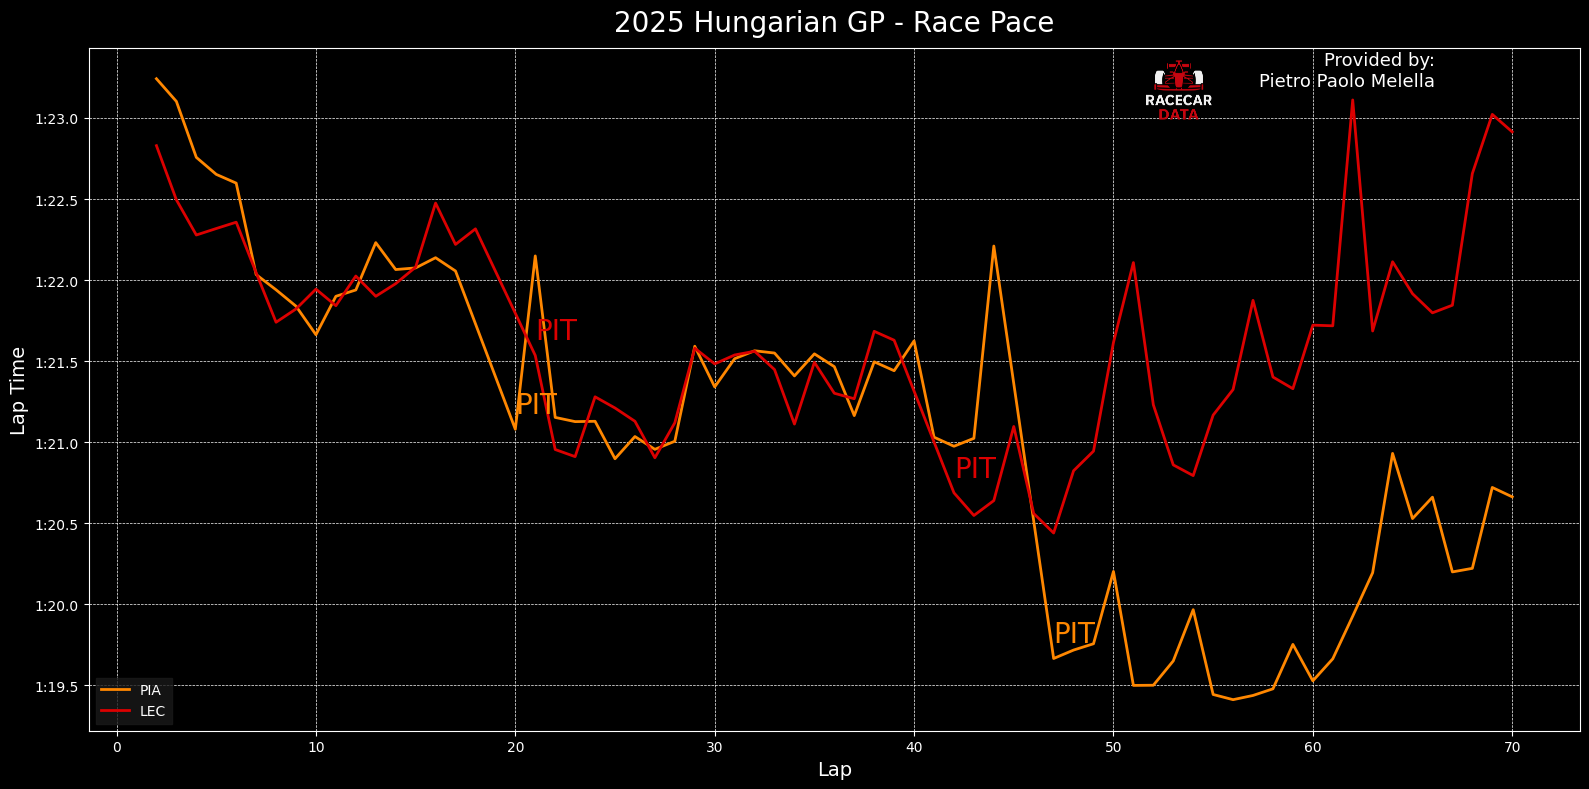

In [27]:
selected_drivers = ['PIA', 'LEC']
plot = RacePacePlot(transformed_laps, TEAM_COLORS)
plot.plot(drivers=selected_drivers)

### 🏎️ Driver Pace by Stint

This script creates boxplots of lap times per driver for a given stint, sorted by median lap time.  
Under each lower whisker, it annotates the driver’s mean and median lap times for quick comparison.  

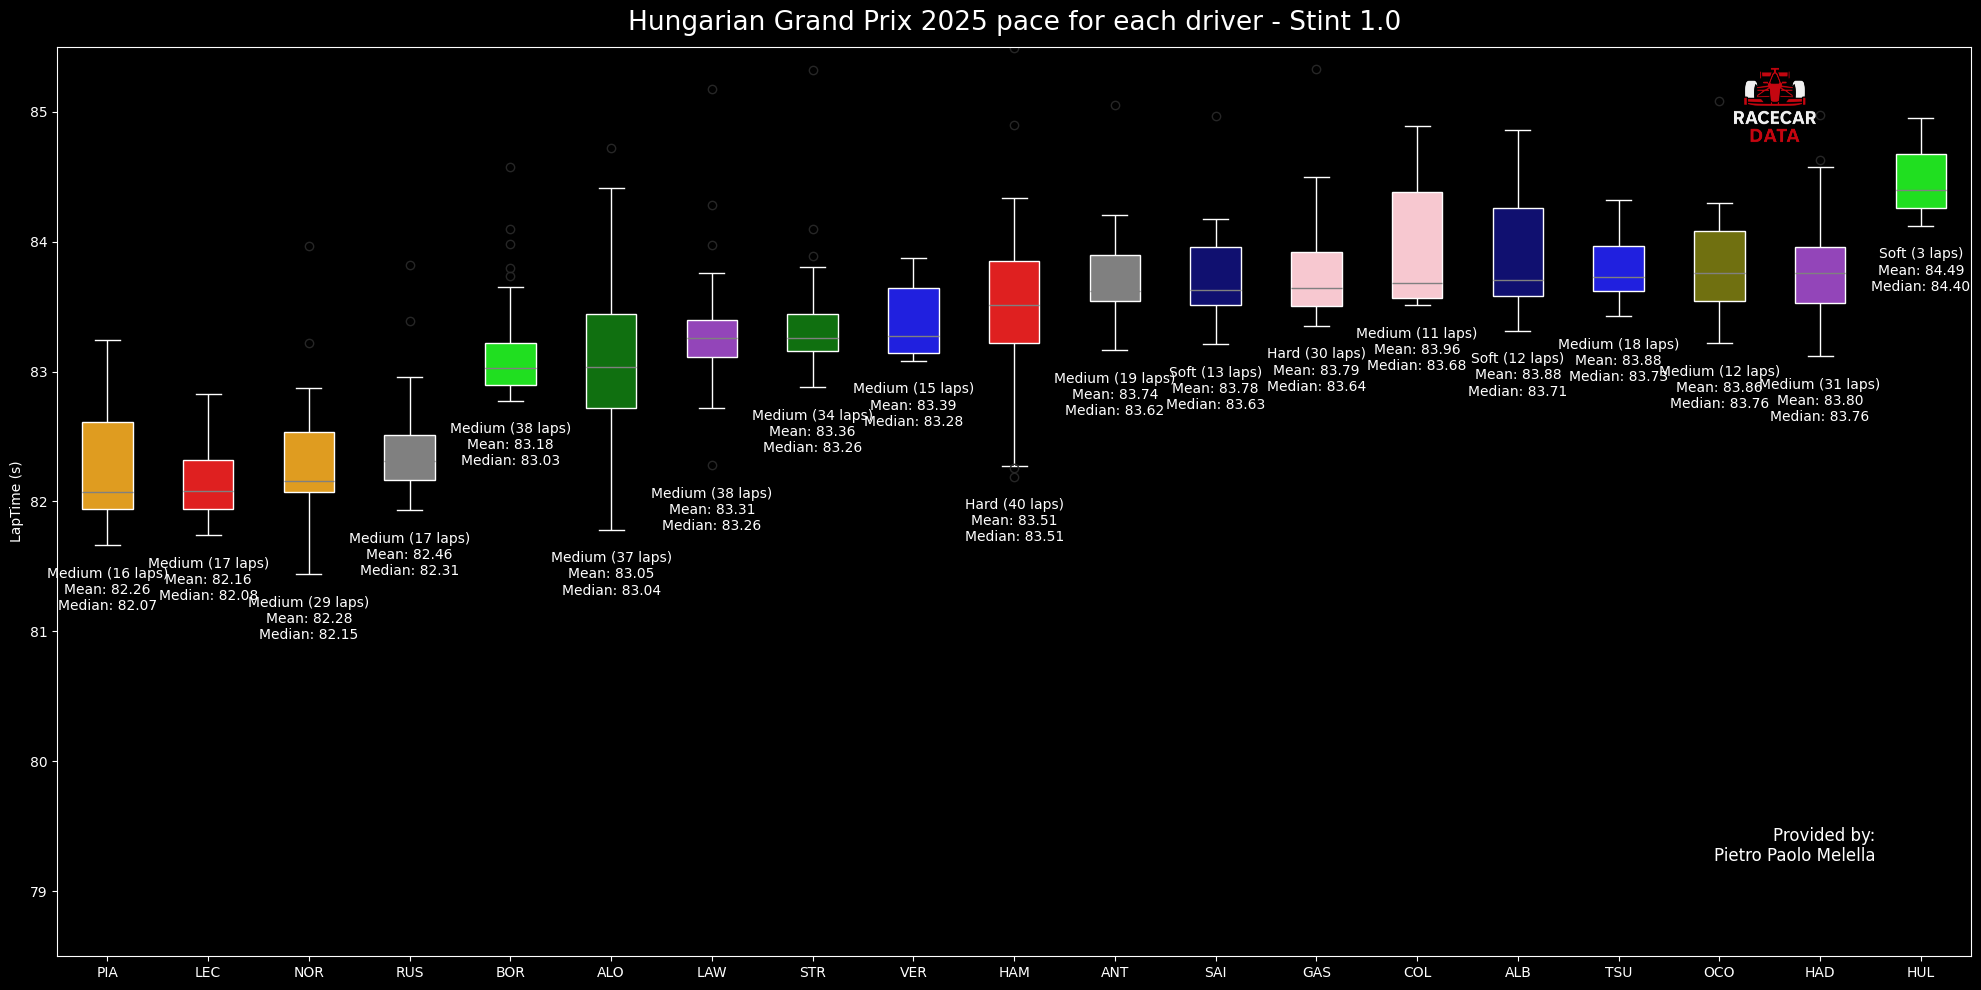

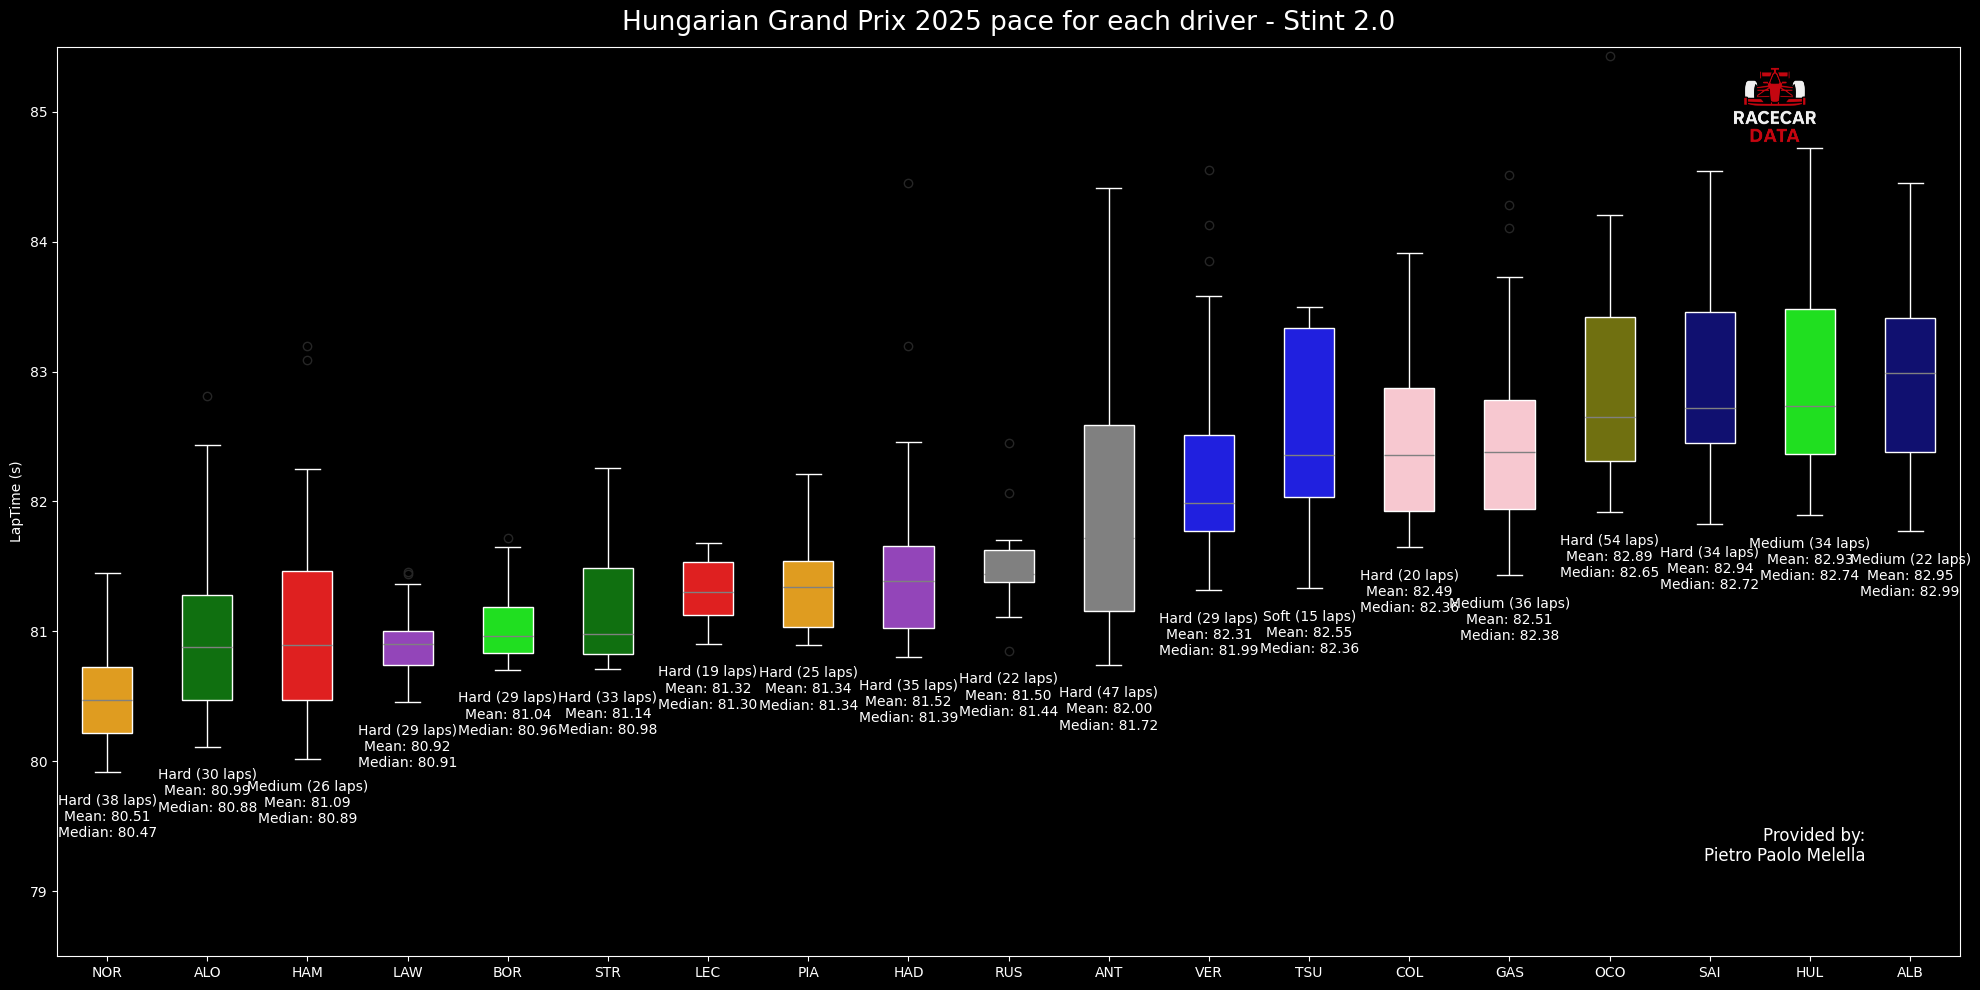

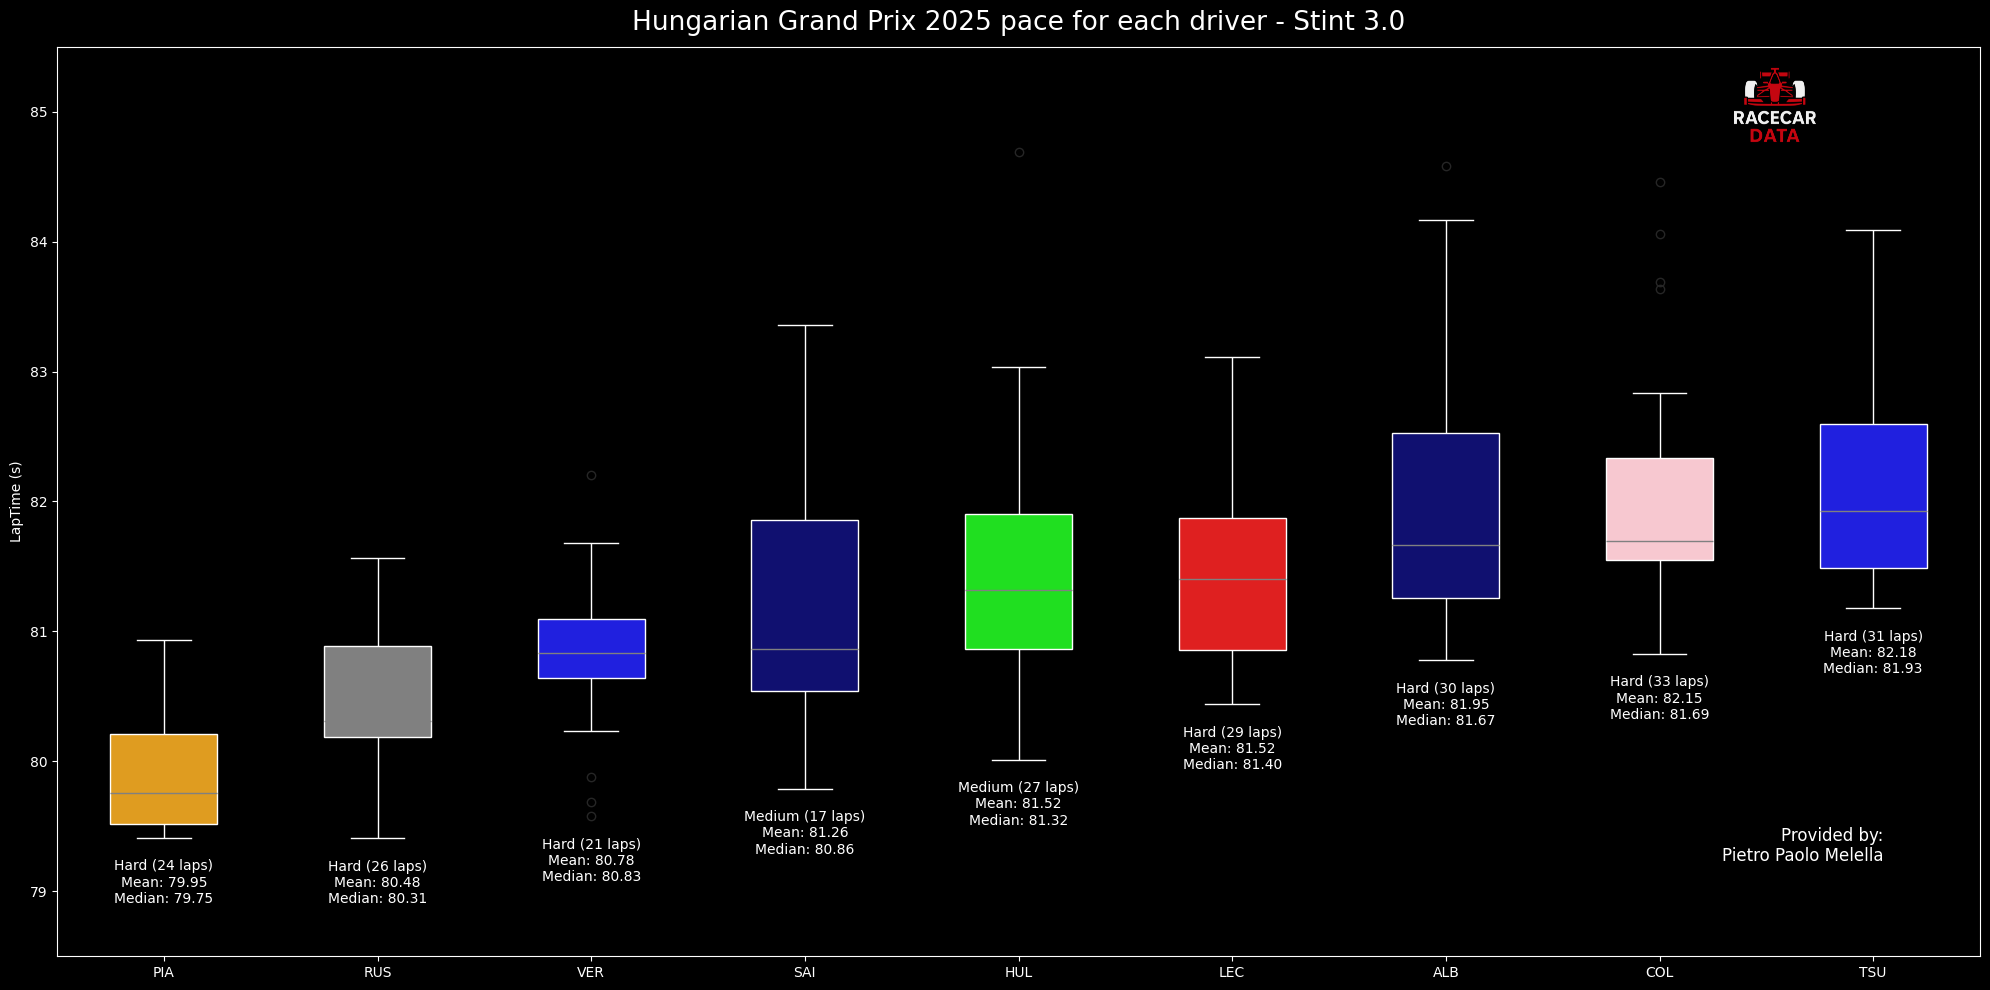

In [30]:
def plot_lap_times_for_stint_with_driver_stats(stint, transformed_laps, colors):
    # 1) Filter for the specific stint
    laps_with_stint = transformed_laps[transformed_laps['Stint'] == stint].copy()
    laps_with_stint.reset_index(drop=True, inplace=True)

    # Normalize compound names to Title case
    laps_with_stint['Compound'] = laps_with_stint['Compound'].str.title()

    # 2) Compute median lap time per driver, then sort drivers by that median
    median_lap_times = laps_with_stint.groupby('Driver')['LapTime (s)'].median()
    sorted_drivers = median_lap_times.sort_values().index

    # 3) Create the boxplot
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.boxplot(
        data=laps_with_stint,
        x="Driver",
        y="LapTime (s)",
        hue="Driver",
        palette=colors,
        order=sorted_drivers,
        whiskerprops=dict(color="white"),
        boxprops=dict(edgecolor="white"),
        medianprops=dict(color="grey"),
        capprops=dict(color="white"),
        width=0.5,
        dodge=False,
        legend=False
    )

    # 4) Compute driver_stats (mean, median, min(LapTime) for annotation)
    driver_stats = laps_with_stint.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min'])
    
    # 5) Get compound per driver
    driver_compound = laps_with_stint.groupby('Driver')['Compound'].first()

    # 6) Get number of laps per driver
    driver_laps = laps_with_stint.groupby('Driver')['LapTime (s)'].count()

    # 7) Annotate
    for i, driver in enumerate(sorted_drivers):
        whisker_position = driver_stats.loc[driver, 'min']
        mean_time = driver_stats.loc[driver, 'mean']
        median_time = driver_stats.loc[driver, 'median']
        compound = driver_compound[driver]
        num_laps = driver_laps[driver]

        ax.text(
            i, whisker_position - 0.5,
            f'{compound} ({num_laps} laps)\nMean: {mean_time:.2f}\nMedian: {median_time:.2f}',
            horizontalalignment='center',
            color='white',
            fontsize=10
        )

    # 8) Add attribution, title, grid, and axis tweaks
    plt.text(
        0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=12
    )
    plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver - Stint {stint}")
    plt.grid(visible=False)
    ax.set(xlabel=None)
    ax.set_ylim(78.5, 85.5)  # adjust if your LapTime range is different
    plt.tight_layout()
    sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
    logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

    if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.80, 0.83, 0.12, 0.12], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
    else:
            print(f"[WARN] Logo file not found at: {logo_path}")
    plt.show()

# Loop over each unique stint and plot
for stint in sorted(transformed_laps['Stint'].unique()):
    plot_lap_times_for_stint_with_driver_stats(stint, transformed_laps, colors)

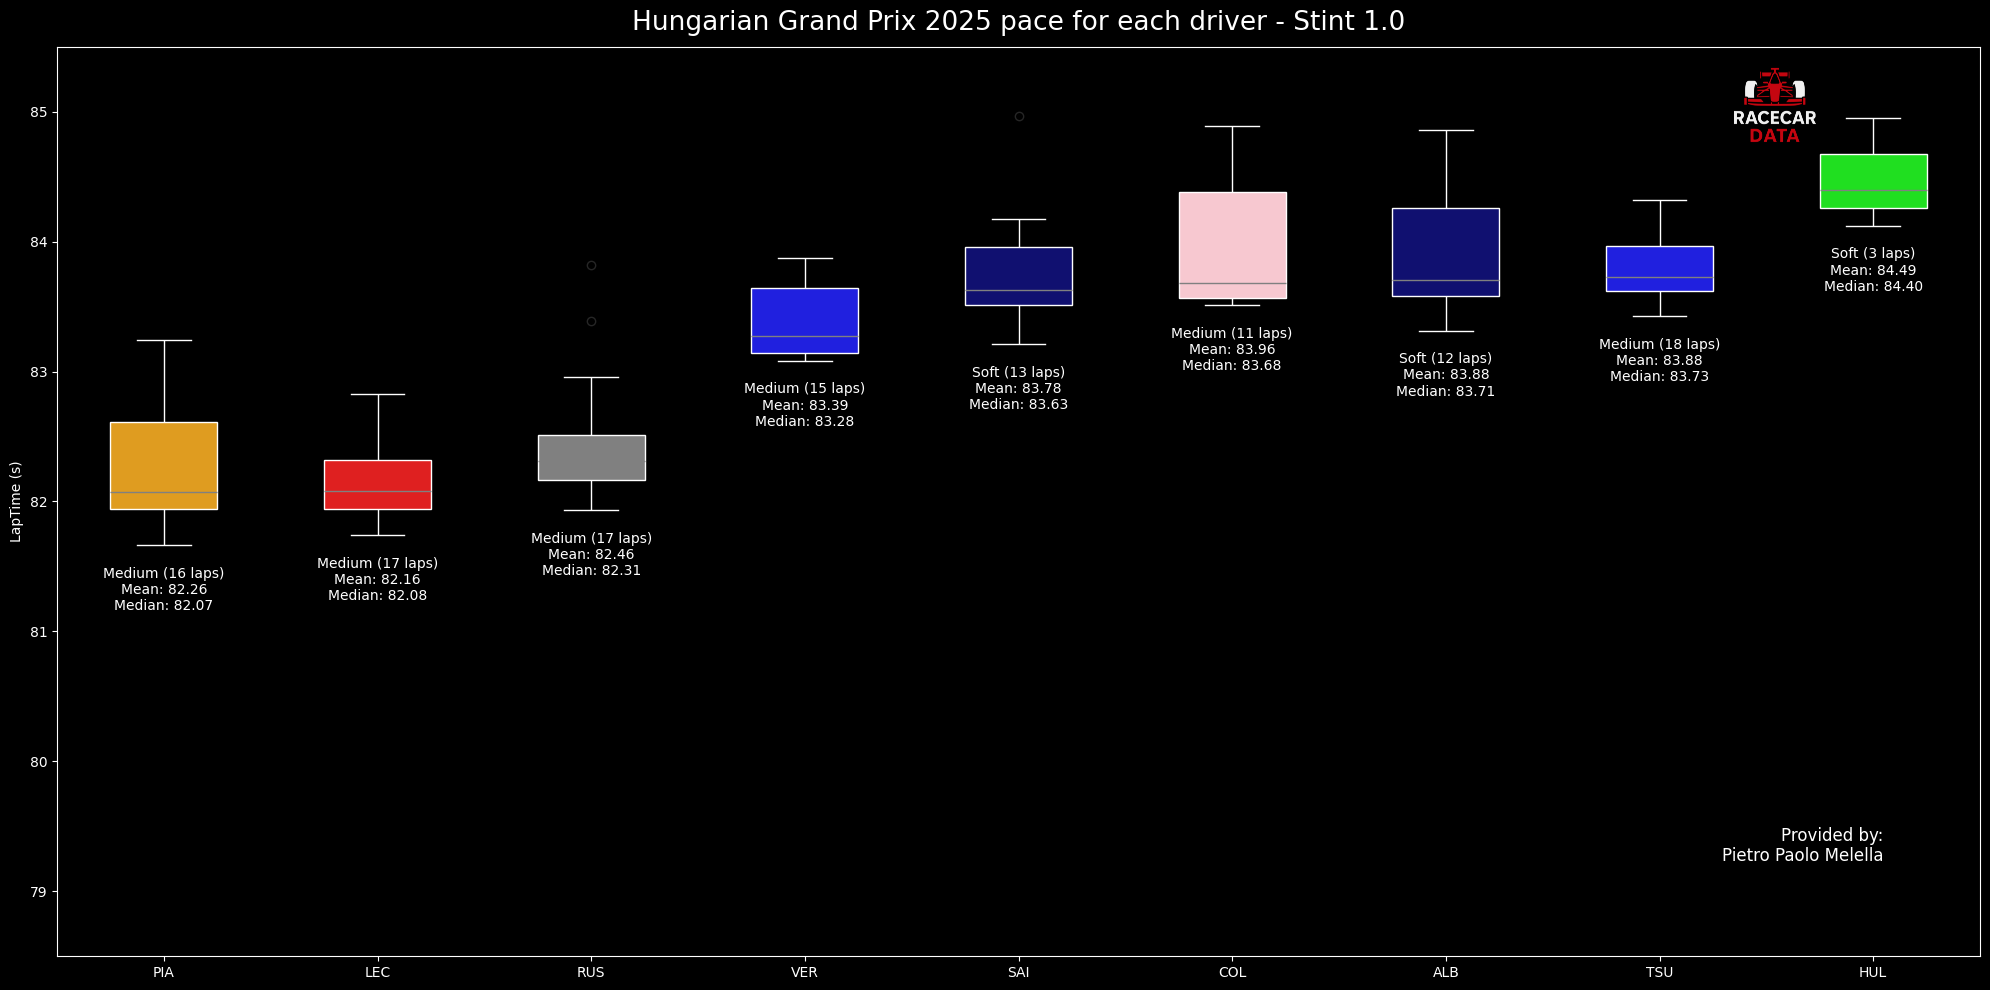

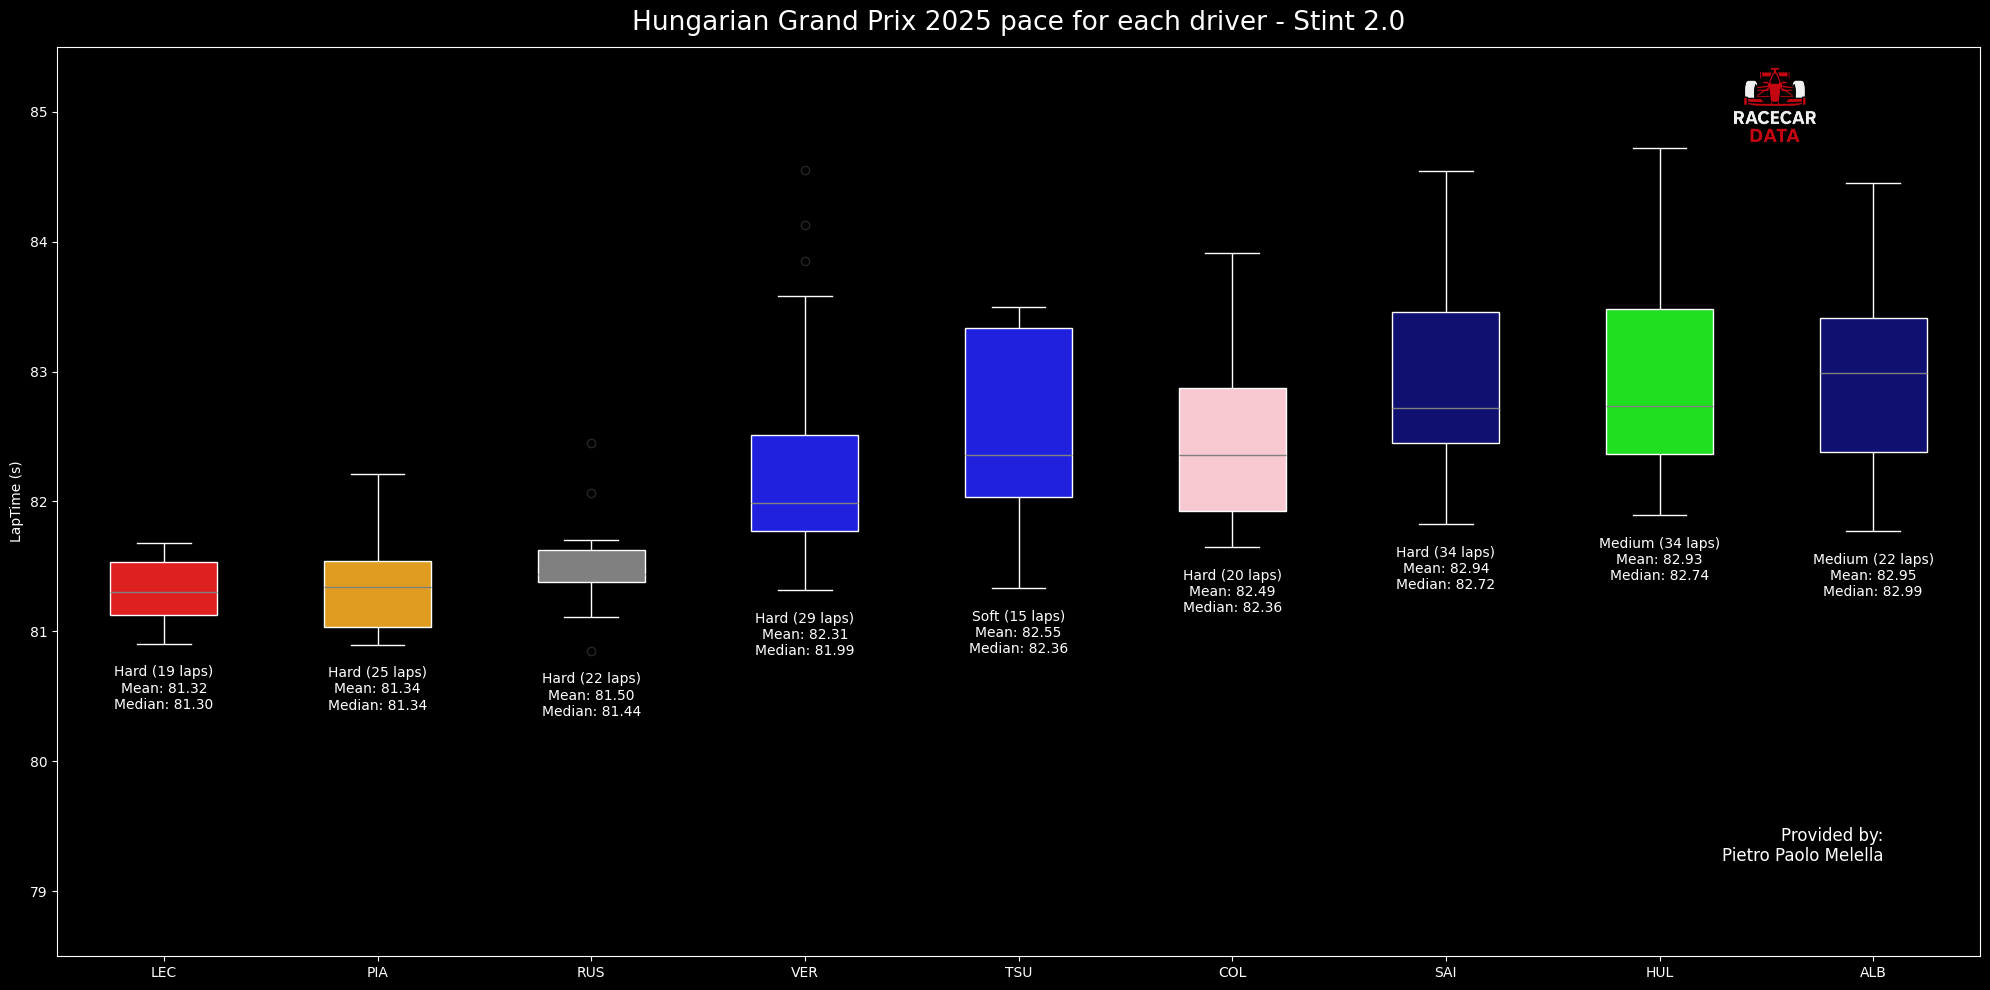

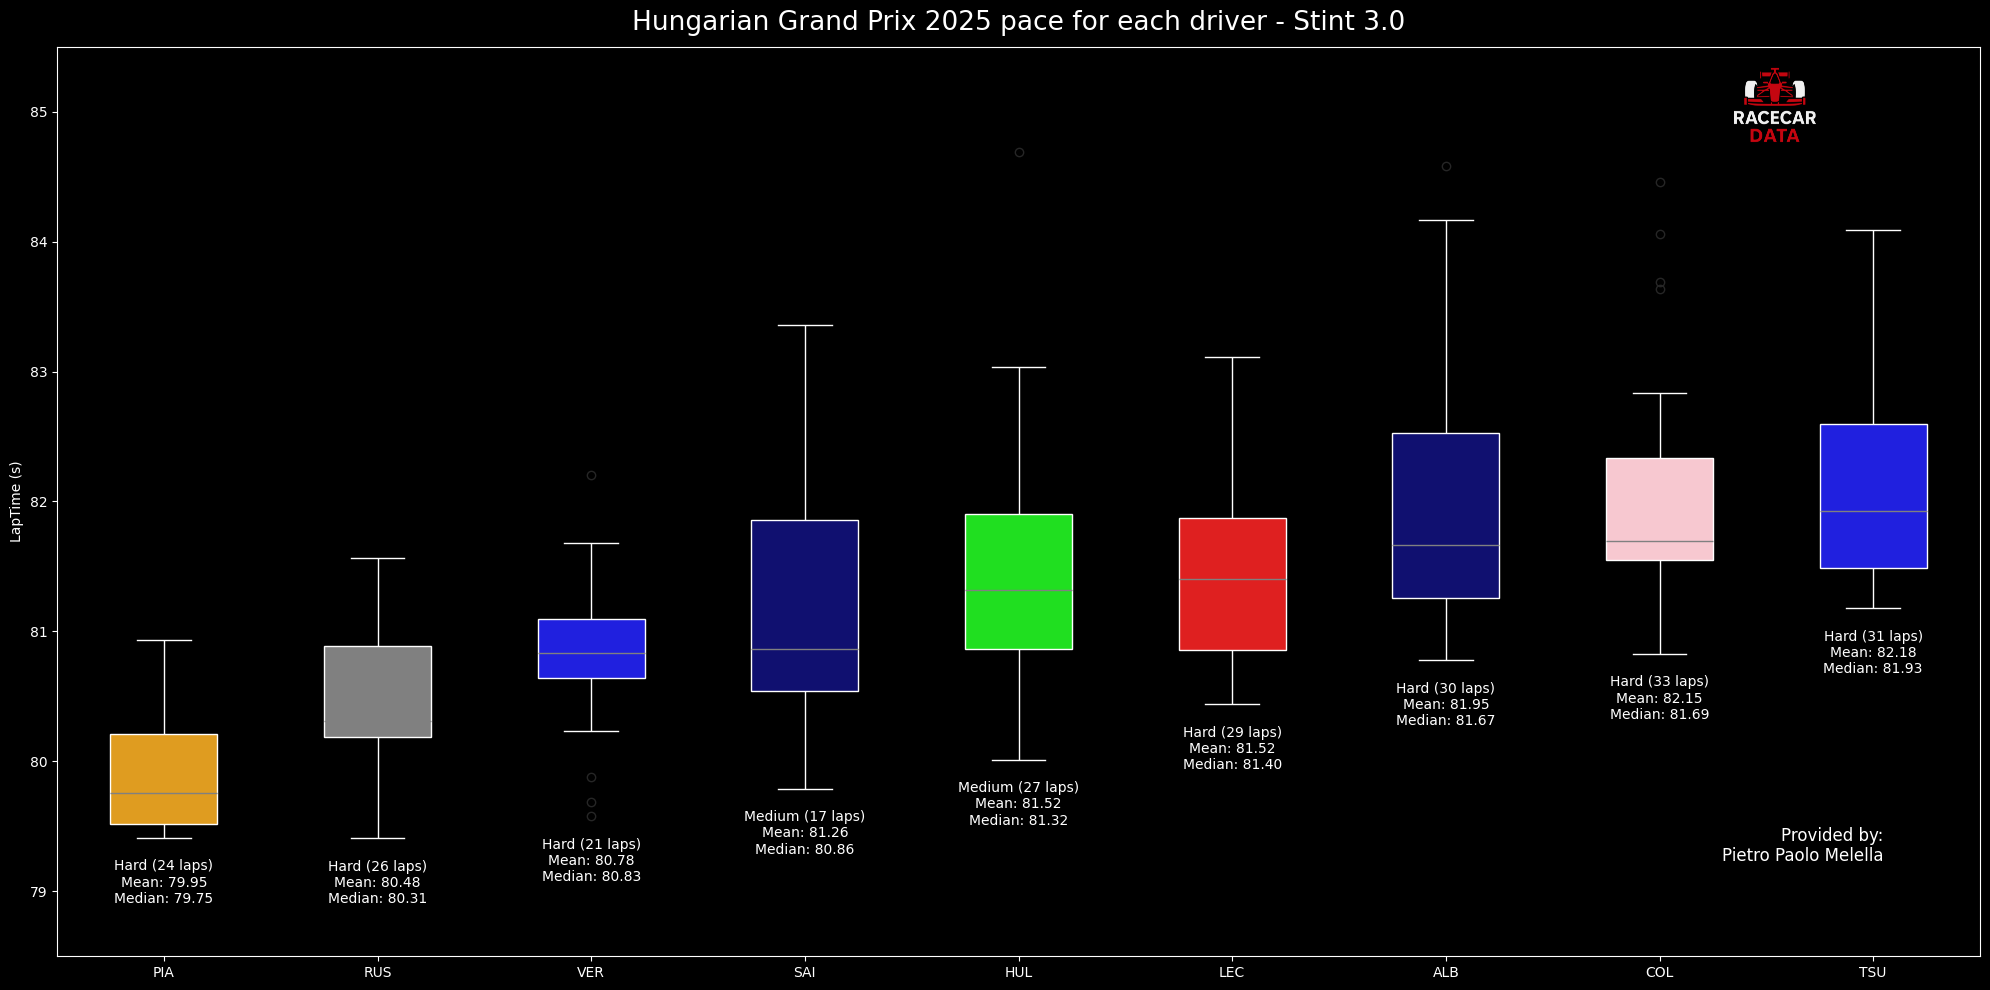

In [31]:
third_stint = transformed_laps[transformed_laps['Stint'] == 3].copy()
pilots_2_stops =third_stint['Driver'].unique()

filtered_df_2_stops = transformed_laps[transformed_laps['Driver'].isin(pilots_2_stops)].copy()


# Example: loop over each unique stint and plot
for stint in sorted(filtered_df_2_stops['Stint'].unique()):
    plot_lap_times_for_stint_with_driver_stats(stint, filtered_df_2_stops, colors)


### 🕒 Average Gap to Fastest Driver

Here we measure each driver’s average gap (in seconds) to the fastest driver over the race.  
This gives a normalized view of performance, independent of just best laps.  
It helps highlight sustained race pace differences and exposes whether someone was consistently close to the front or significantly off-pace.

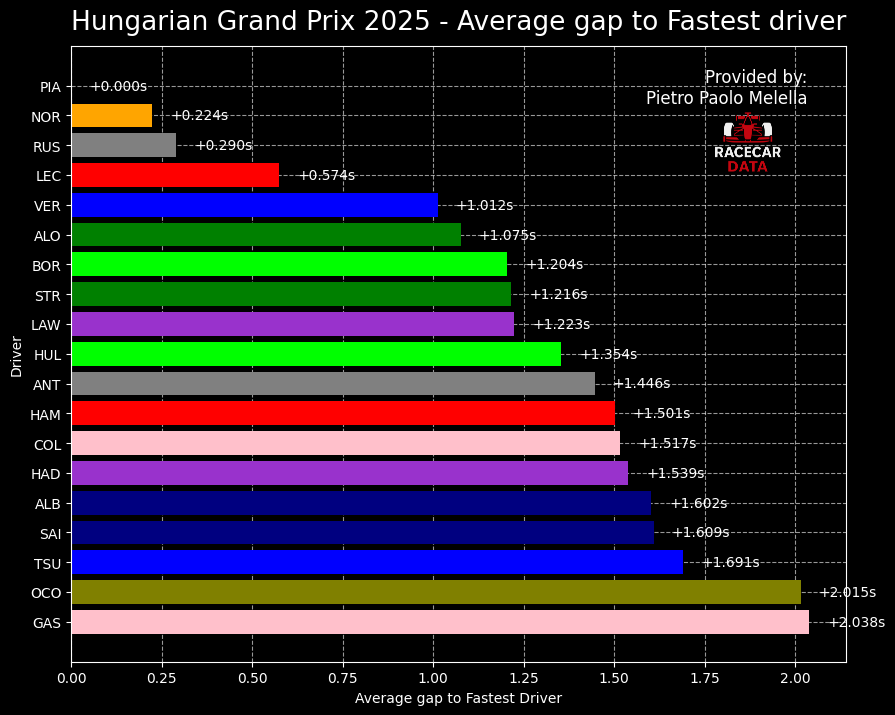

In [36]:
mean_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top

sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

fig = plt.gcf()  # get current figure
if os.path.exists(logo_path):
    logo_img = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([0.73, 0.70, 0.12, 0.12], anchor='NE', zorder=10)
    logo_ax.imshow(logo_img)
    logo_ax.axis('off')
plt.show()

### 📊 Lap Time Consistency (Standard Deviation)

This analysis focuses on **consistency** by calculating the standard deviation of lap times for each driver.  
A lower standard deviation indicates smoother, more predictable performance — critical in race conditions for tyre management and strategy.  
Drivers with small variation often execute stints more efficiently, even if they aren’t the absolute fastest.

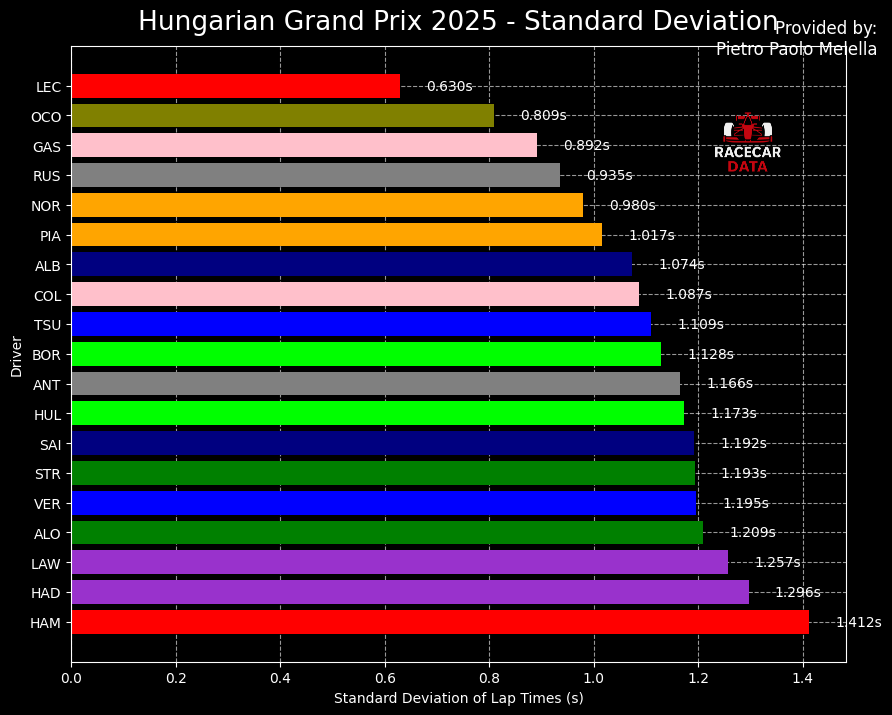

In [38]:
# Calculate the standard deviation of lap times for each driver
std_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].std()

# Sort the standard deviation values for better visualization (lowest to highest)
std_lap_times_sorted = std_lap_times.sort_values(ascending=True)

# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(std_lap_times_sorted.index, std_lap_times_sorted.values, 
                color=[colors[driver] for driver in std_lap_times_sorted.index])
plt.xlabel("Standard Deviation of Lap Times (s)")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Standard Deviation")

# Add standard deviation values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    1.04, 0.98, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the most consistent drivers on top
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

fig = plt.gcf()  # get current figure
if os.path.exists(logo_path):
    logo_img = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([0.73, 0.70, 0.12, 0.12], anchor='NE', zorder=10)
    logo_ax.imshow(logo_img)
    logo_ax.axis('off')
plt.show()
plt.show()

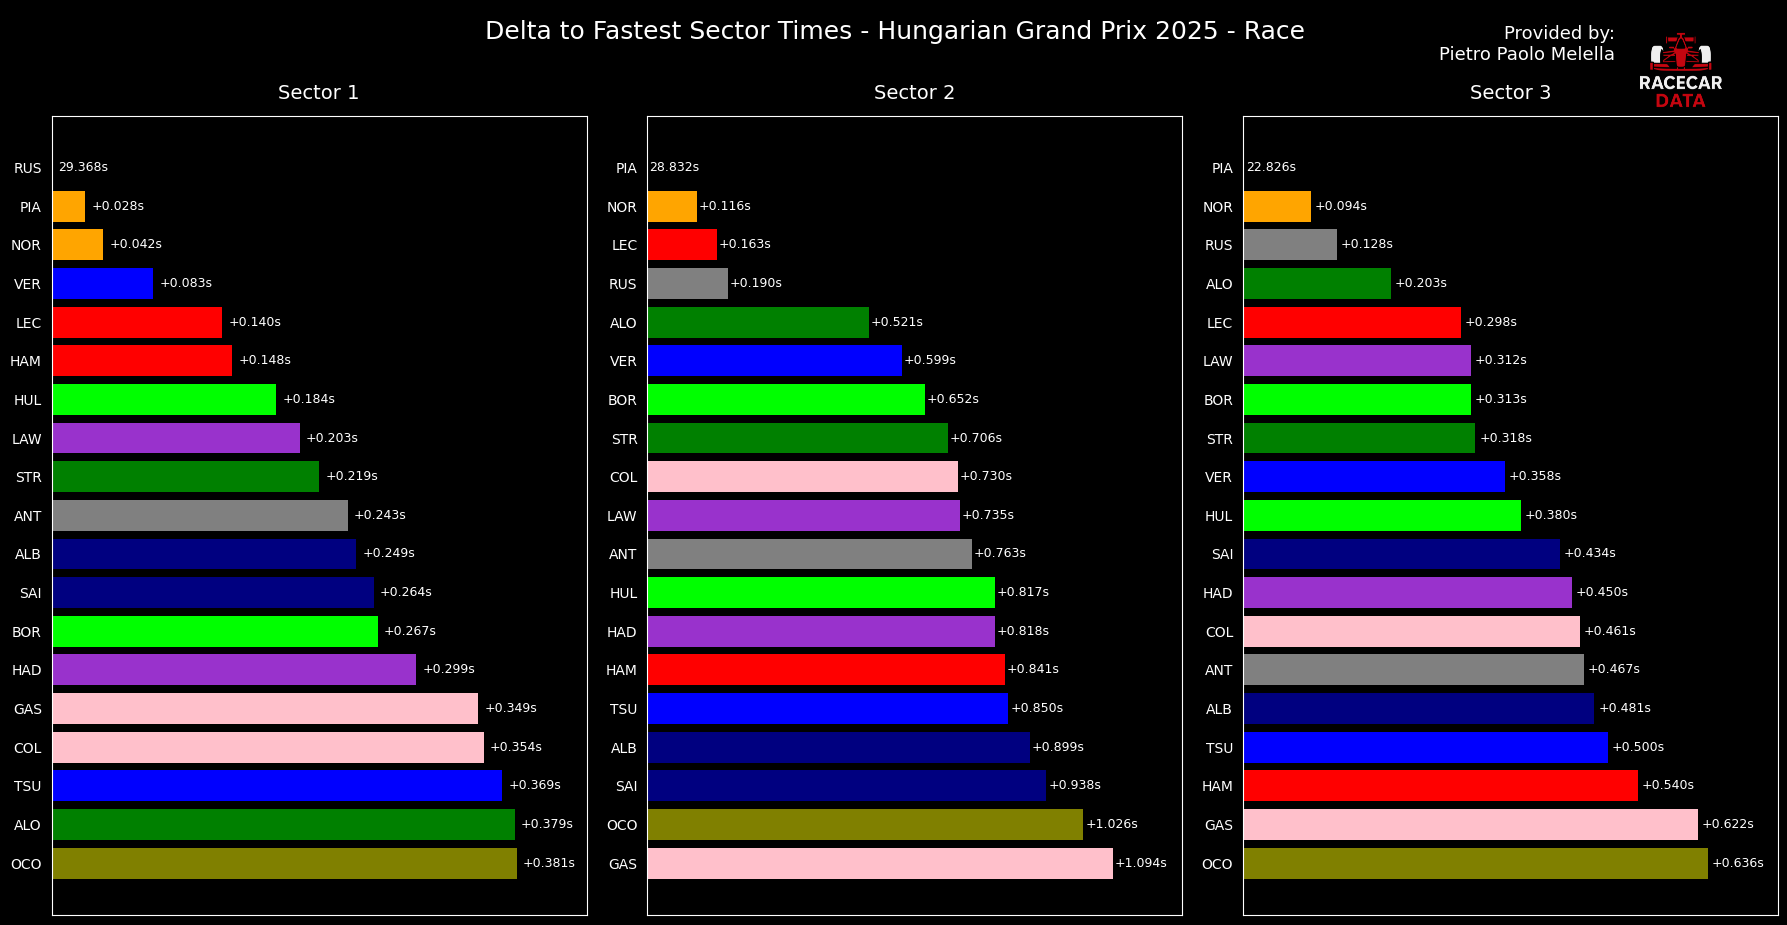

In [40]:
def plot_sector_deltas(
    laps_df,
    colors,
    figsize=(18, 10),
    sharey=False,
    suptitle=f"Delta to Fastest Sector Times - {session.event['EventName']} {session.event.year} - Race"
):
    """
    Compute per-driver average sector times, their delta to the fastest in each sector,
    and plot three side-by-side horizontal bar charts with annotations.

    Parameters
    ----------
    laps_df : pd.DataFrame
        DataFrame containing at least ['Driver','Sector1Time','Sector2Time','Sector3Time']
        where the SectorXTime columns are timedeltas.
    colors : dict
        Mapping from driver name to a matplotlib color.
    figsize : tuple
        Figure size passed to plt.subplots.
    sharey : bool
        Whether the three subplots share the same y-axis.
    suptitle : str
        The figure’s overall title.
    """
    # 1) average and convert to seconds
    avg = (
        laps_df
        .groupby('Driver')[['Sector1Time','Sector2Time','Sector3Time']]
        .mean()
        .reset_index()
    )
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        avg[col] = avg[col].dt.total_seconds()

    # 2) compute deltas
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        best = avg[col].min()
        avg[col.replace('Time','_Delta')] = avg[col] - best

    # 3) prepare sorted DataFrames
    s1 = avg[['Driver','Sector1Time','Sector1_Delta']].sort_values('Sector1_Delta')
    s2 = avg[['Driver','Sector2Time','Sector2_Delta']].sort_values('Sector2_Delta')
    s3 = avg[['Driver','Sector3Time','Sector3_Delta']].sort_values('Sector3_Delta')

    # 4) plot
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=sharey)
    config = [
        ("Sector 1", s1, 'Sector1Time', 'Sector1_Delta'),
        ("Sector 2", s2, 'Sector2Time', 'Sector2_Delta'),
        ("Sector 3", s3, 'Sector3Time', 'Sector3_Delta'),
    ]

    for ax, (title, df, time_col, delta_col) in zip(axes, config):
        drivers = df['Driver']
        avg_times = df[time_col]
        deltas    = df[delta_col]
        cols      = [colors.get(d, 'black') for d in drivers]

        bars = ax.barh(drivers, deltas, color=cols)
        for bar, d, t in zip(bars, deltas, avg_times):
            txt = f"{t:.3f}s" if d == 0 else f"+{d:.3f}s"
            ax.text(
                bar.get_width() + 0.005,
                bar.get_y() + bar.get_height()/2,
                txt,
                va='center', ha='left',
                fontsize=9, color='white'
            )
        pad = deltas.max() * 0.15
        ax.set_xlim(0, deltas.max() + pad)
        ax.set_title(title, fontsize=14)
        ax.invert_yaxis()
        ax.tick_params(left=False, labelleft=True,
                       bottom=False, labelbottom=False)
        ax.set_xlabel("")
        ax.grid(False)

    fig.suptitle(
    suptitle,
    fontsize=18, y=0.98, ha='center', color='white'
    )

    fig.text(
        0.9, 0.90,  # X (left-right), Y (bottom-top)
        "Provided by:\nPietro Paolo Melella",
        ha='right', fontsize=13, color='white'
    )
    
    plt.suptitle(suptitle, fontsize=18, y=0.94)
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
    logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

    if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.85, 0.83, 0.12, 0.12], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
    else:
            print(f"[WARN] Logo file not found at: {logo_path}")
    plt.show()
    return fig, axes

# assuming `transformed_laps` is your DataFrame and `colors` your dict:
fig, axes = plot_sector_deltas(transformed_laps, colors)

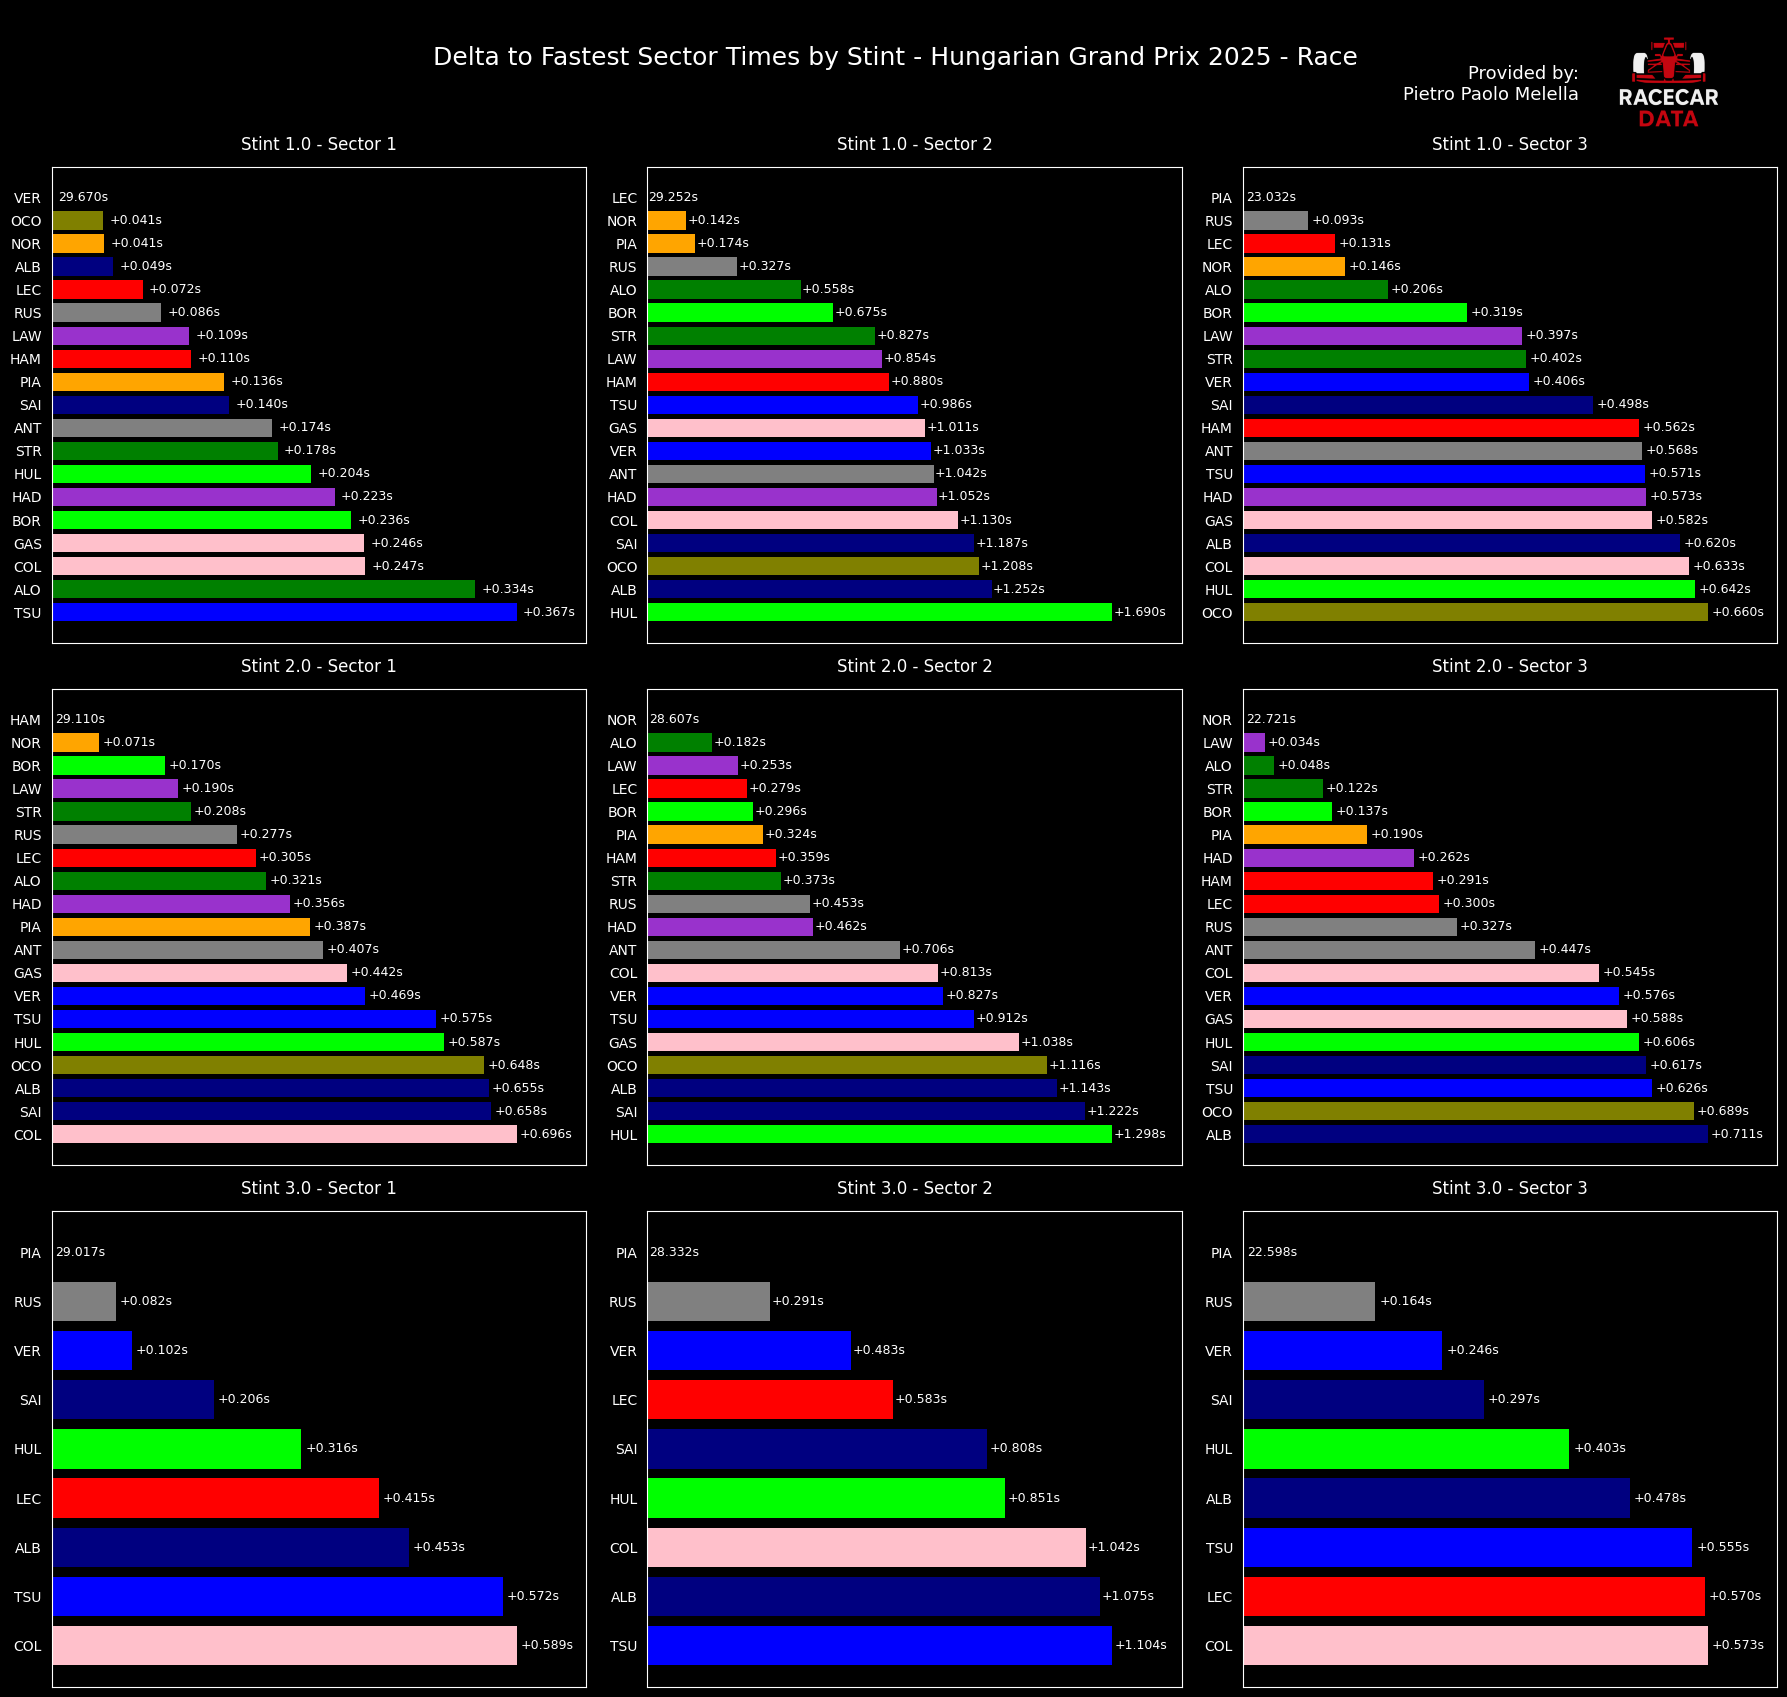

In [50]:
def plot_sector_deltas_by_stint(
    laps_df,
    colors,
    figsize_per_stint=(18, 6),
    sharey=False,
    suptitle=f"Delta to Fastest Sector Times by Stint - {session.event['EventName']} {session.event.year} - Race"
):
    """
    Compute per-driver average sector times, their delta to the fastest in each sector,
    separately for each stint, and plot a grid of three horizontal bar charts per stint.

    Parameters
    ----------
    laps_df : pd.DataFrame
        DataFrame containing at least ['Driver','Stint','Sector1Time','Sector2Time','Sector3Time']
        where the SectorXTime columns are timedeltas.
    colors : dict
        Mapping from driver name to a matplotlib color.
    figsize_per_stint : tuple
        Figure size for each row of subplots (3 columns) passed to plt.subplots.
    sharey : bool
        Whether plots share the same y-axis within each row.
    suptitle : str
        The figure’s overall title.
    """
    # 1) average times per driver per stint and convert to seconds
    avg = (
        laps_df
        .groupby(['Stint', 'Driver'])[['Sector1Time','Sector2Time','Sector3Time']]
        .mean()
        .reset_index()
    )
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        avg[col] = avg[col].dt.total_seconds()

    # 2) find number of stints and set up figure
    stints = sorted(avg['Stint'].unique())
    n_stints = len(stints)
    fig, axes = plt.subplots(
        n_stints, 3,
        figsize=(figsize_per_stint[0], figsize_per_stint[1] * n_stints),
        sharey=sharey
    )

    # ensure axes is 2D array
    axes = np.atleast_2d(axes)

    # 3) iterate over stints
    for row_idx, stint in enumerate(stints):
        sub = avg[avg['Stint'] == stint].copy()  # avoid SettingWithCopy
        # compute deltas within this stint
        for col in ['Sector1Time','Sector2Time','Sector3Time']:
            best = sub[col].min()
            sub.loc[:, col.replace('Time', '_Delta')] = sub[col] - best

        # prepare sorted data for each sector
        sector_data = []
        for i in (1, 2, 3):
            time_col = f'Sector{i}Time'
            delta_col = f'Sector{i}_Delta'
            df_sorted = sub[['Driver', time_col, delta_col]].sort_values(delta_col)
            sector_data.append((f'Sector {i}', df_sorted, time_col, delta_col))

        # plot three charts for this stint
        for col_idx, (title, df_sec, time_col, delta_col) in enumerate(sector_data):
            ax = axes[row_idx][col_idx]
            drivers = df_sec['Driver'].tolist()
            avg_times = df_sec[time_col].tolist()
            deltas    = df_sec[delta_col].tolist()
            cols      = [colors.get(d, 'black') for d in drivers]

            bars = ax.barh(drivers, deltas, color=cols)
            for bar, d, t in zip(bars, deltas, avg_times):
                txt = f"{t:.3f}s" if d == 0 else f"+{d:.3f}s"
                ax.text(
                    bar.get_width() + 0.005,
                    bar.get_y() + bar.get_height() / 2,
                    txt,
                    va='center', ha='left', fontsize=9, color='white'
                )

            # avoid singular x-limits when all deltas are zero
            max_delta = max(deltas) if deltas else 0
            pad = max_delta * 0.15
            upper = max_delta + pad
            if upper <= 0:
                upper = 0.1
            ax.set_xlim(0, upper)

            ax.set_title(f"Stint {stint} - {title}", fontsize=12)
            ax.invert_yaxis()
            ax.tick_params(left=False, labelleft=True,
                           bottom=False, labelbottom=False)
            ax.set_xlabel("")
            ax.grid(False)
    
    fig.suptitle(
    suptitle,
    fontsize=18, y=0.98, ha='center', color='white'
    )

    fig.text(
        0.88, 0.92,  # X (left-right), Y (bottom-top)
        "Provided by:\nPietro Paolo Melella",
        ha='right', fontsize=13, color='white'
    )

    # overall title and footer
    plt.suptitle(suptitle, fontsize=18, y=0.95)
    fig.tight_layout(rect=[0, 0.03, 1, 0.93])
    sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
    logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

    if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.89, 0.89, 0.08, 0.08], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
    else:
            print(f"[WARN] Logo file not found at: {logo_path}")
    plt.show()
    return fig, axes

fig1, axes1 = plot_sector_deltas_by_stint(transformed_laps, colors)


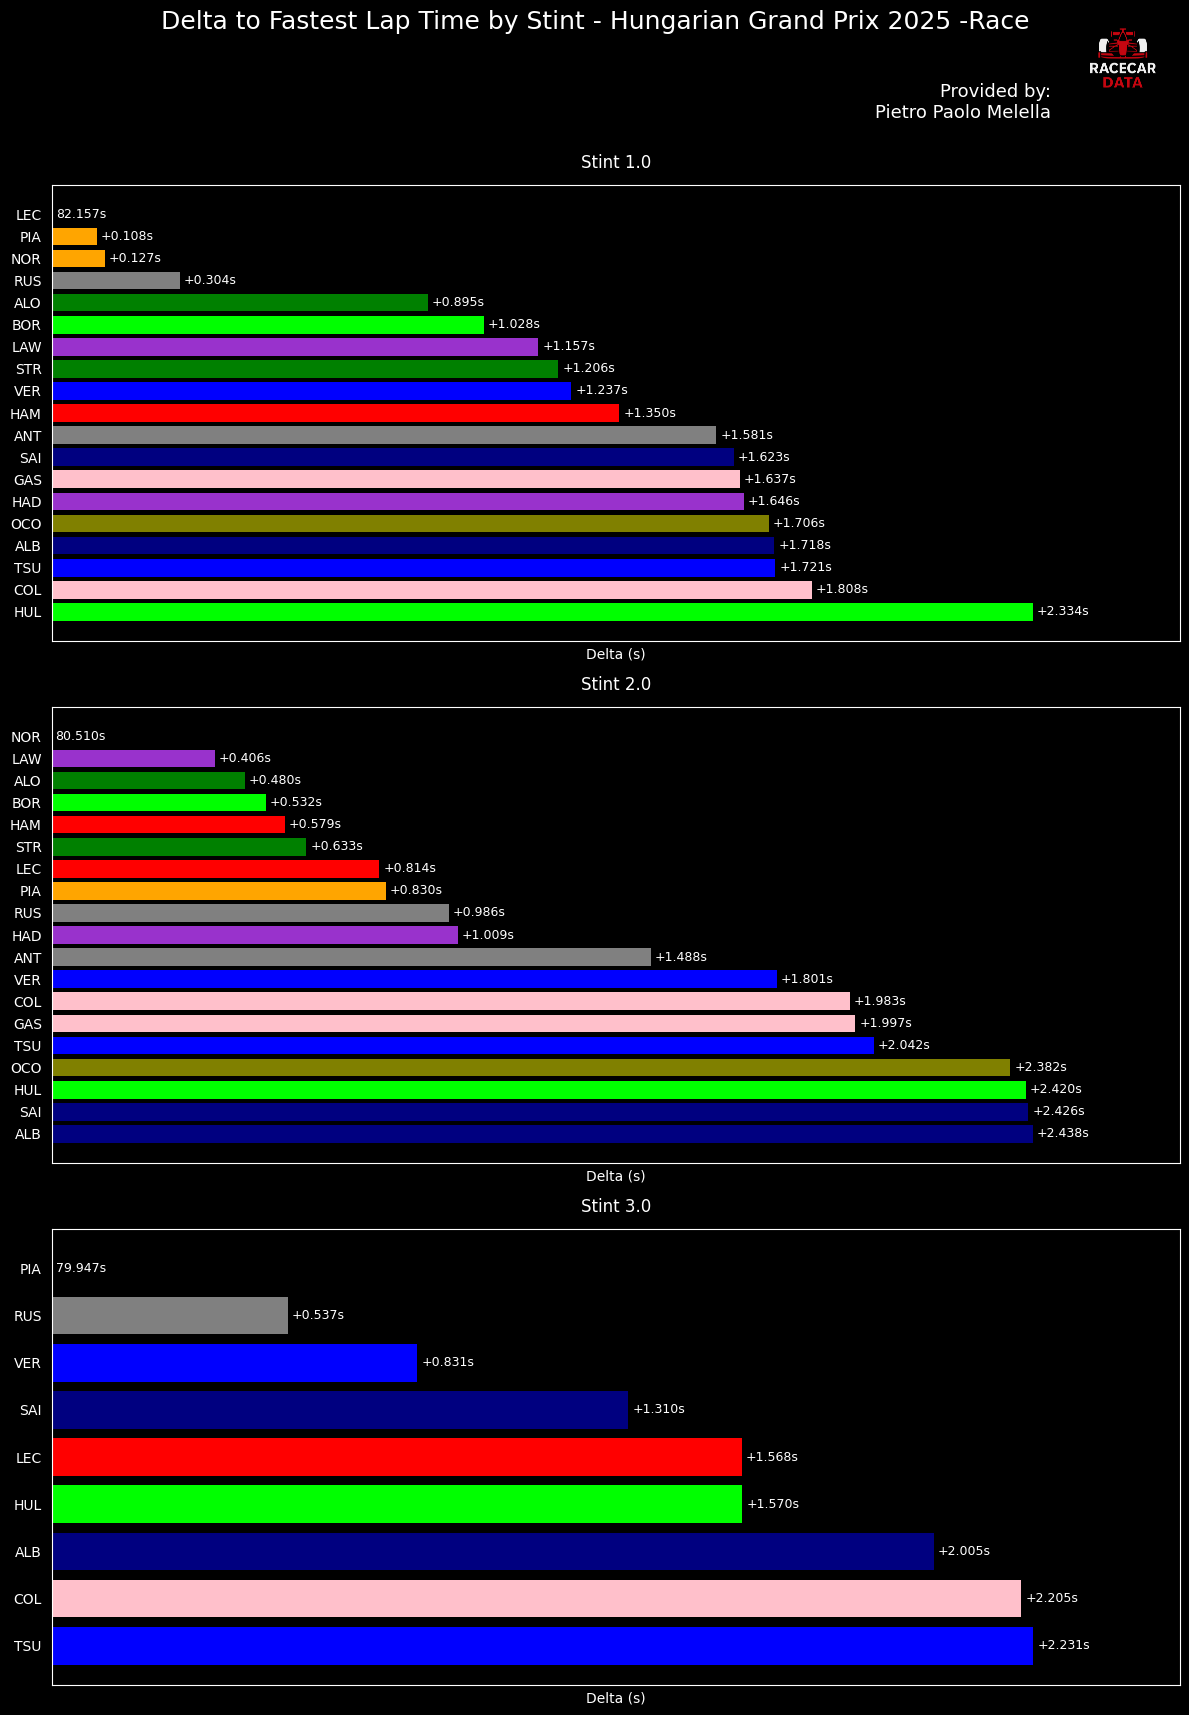

In [55]:
def plot_stint_deltas(
    laps_df,
    colors,
    figsize_per_stint=(12, 6),
    sharey=False,
    suptitle=f"Delta to Fastest Lap Time by Stint - {session.event['EventName']} {session.event.year} -Race"
):
    """
    Plotta i delta al giro più veloce per ogni stint.
    Ogni stint è un grafico orizzontale, senza divisione per settore.

    Parameters
    ----------
    laps_df : pd.DataFrame
        Deve contenere almeno ['Driver','Stint','LapTime'] come timedelta.
    colors : dict
        Mappa driver -> colore matplotlib.
    figsize_per_stint : tuple
        Dimensioni figura per riga (width, height per stint).
    sharey : bool
        Se i subplot condividono l'asse y.
    suptitle : str
        Titolo complessivo della figura.
    """
    
    # filtra stint vuoti o con tempi NaT
    laps_df = laps_df.dropna(subset=["LapTime"])
    if laps_df.empty:
        raise ValueError("Il DataFrame non contiene lap validi per il calcolo.")
    
    # calcola tempo medio giro per stint e driver
    avg = (
        laps_df
        .groupby(['Stint','Driver'])[['LapTime']]
        .mean()
        .reset_index()
    )
    avg['LapTime'] = avg['LapTime'].dt.total_seconds()

    # seleziona stint validi (almeno 1 giro registrato)
    stints = [s for s in sorted(avg['Stint'].unique()) 
              if not avg[avg['Stint']==s]['LapTime'].isna().all()]
    n_stints = len(stints)
    
    if n_stints == 0:
        raise ValueError("Nessuno stint valido per il plotting.")

    fig, axes = plt.subplots(
        n_stints, 1,
        figsize=(figsize_per_stint[0], figsize_per_stint[1] * n_stints),
        sharey=sharey
    )
    axes = np.atleast_1d(axes)

    for row_idx, stint in enumerate(stints):
        ax = axes[row_idx]
        sub = avg[avg['Stint']==stint].copy()

        # calcola delta rispetto al più veloce nello stint
        best_time = sub['LapTime'].min()
        sub['Delta'] = sub['LapTime'] - best_time

        # ordina per delta crescente
        sub = sub.sort_values('Delta')
        drivers = sub['Driver'].tolist()
        deltas  = sub['Delta'].tolist()
        times   = sub['LapTime'].tolist()
        cols    = [colors.get(d, 'black') for d in drivers]

        bars = ax.barh(drivers, deltas, color=cols)
        for bar, d, t in zip(bars, deltas, times):
            txt = f"{t:.3f}s" if d == 0 else f"+{d:.3f}s"
            ax.text(
                bar.get_width() + 0.01,
                bar.get_y() + bar.get_height()/2,
                txt,
                va='center', ha='left', fontsize=9, color='white'
            )
 

        ax.set_title(f"Stint {stint}", fontsize=12)
        ax.invert_yaxis()
        ax.tick_params(left=False, labelleft=True,
                       bottom=False, labelbottom=False)
        ax.set_xlabel("Delta (s)")
        ax.grid(False)
        
        # padding sull'asse x
        max_delta = max(deltas) if deltas else 0
        ax.set_xlim(0, max_delta*1.15 if max_delta>0 else 0.1)
    
    fig.suptitle(
    suptitle,
    fontsize=18, y=0.98, ha='center', color='white'
    )

    fig.text(
        0.88, 0.92,  # X (left-right), Y (bottom-top)
        "Provided by:\nPietro Paolo Melella",
        ha='right', fontsize=13, color='white'
    )
    fig.tight_layout(rect=[0, 0.03, 1, 0.93])
    sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
    logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

    if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.90, 0.90, 0.08, 0.08], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
    else:
            print(f"[WARN] Logo file not found at: {logo_path}")
    plt.show()
    return fig, axes

fig3, axes3 = plot_stint_deltas(transformed_laps, colors)

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

class RaceDeltaPlotter:
    def __init__(
        self,
        session,
        transformed_laps: pd.DataFrame,
        driver_color_map: dict,
        lap_time_col: str = "LapTime (s)",
        driver_col: str = "Driver",
        stint_col: str = "Stint",
        lap_number_col: str = "LapNumber",
        within_best_pct: float = 0.1,
        smooth_window: int = 5,
        team_color_func=None,
    ):
        """
        FP-style Race Trace plotter supporting two modes:
        - 'delta_to_average': cumulative delta vs trimmed mean (+pct best lap)
        - 'gap_to_leader': cumulative gap to race leader

        Usage:
          plot(..., mode='delta_to_average')
          plot(..., mode='gap_to_leader')
        """
        self.session = session
        self.laps = transformed_laps.copy()
        self.time_col = lap_time_col
        self.driver_col = driver_col
        self.stint_col = stint_col
        self.lap_col = lap_number_col
        self.pct = within_best_pct
        self.win = smooth_window
        self.color_map = driver_color_map
        self.team_color_func = team_color_func

        # load and clean results
        res = session.results.copy()
        res['Position'] = pd.to_numeric(res['Position'], errors='coerce')
        self.results = res[res['Position'].notna()]

        # normalize driver abbreviations
        self.laps = self._normalize_drivers(self.laps)

        # compute trimmed-mean baseline per lap
        def trimmed_mean(x):
            v = x.dropna().sort_values()
            n = len(v)
            cut = int(n * self.pct)
            if n == 0:
                return np.nan
            if cut == 0 or n <= 2*cut:
                return v.mean()
            return v.iloc[cut:-cut].mean()

        baseline = (
            self.laps.groupby(self.lap_col)[self.time_col]
                     .apply(trimmed_mean)
        )
        self.laps['RefLapTime'] = self.laps[self.lap_col].map(baseline)

        # delta and cumulative delta_to_average
        self.laps['Delta'] = self.laps[self.time_col] - self.laps['RefLapTime']
        self.laps.sort_values([self.driver_col, self.lap_col], inplace=True)
        self.laps['CumDelta'] = self.laps.groupby(self.driver_col)['Delta'].cumsum()

        # compute cumulative time and gap_to_leader
        self.laps['CumTime'] = self.laps.groupby(self.driver_col)[self.time_col].cumsum()
        leader_ct = self.laps.groupby(self.lap_col)['CumTime'].min().rename('LeaderCumTime')
        self.laps = self.laps.merge(leader_ct, left_on=self.lap_col, right_index=True)
        self.laps['GapToLeader'] = self.laps['CumTime'] - self.laps['LeaderCumTime']

    def _sanitize_color(self, c):
        if pd.isna(c) or c is None:
            return None
        s = str(c).strip()
        if re.fullmatch(r'[0-9A-Fa-f]{3,6}', s):
            return f'#{s}'
        if s.startswith('#'):
            return s
        return s

    def _normalize_drivers(self, df):
        df = df.copy()
        full = dict(zip(self.results['FullName'], self.results['Abbreviation']))
        broad = dict(zip(self.results['BroadcastName'], self.results['Abbreviation']))
        abbrs = set(self.results['Abbreviation'])
        def resolve(name):
            if pd.isna(name):
                return None
            if name in abbrs:
                return name
            if name in full:
                return full[name]
            if name in broad:
                return broad[name]
            return name
        df['DriverAbbr'] = df[self.driver_col].apply(resolve)
        return df

    def prepare_top_n(self, n=10):
        topn = self.results.sort_values('Position').head(n)
        return topn['Abbreviation'].tolist()

    def _get_color(self, abbr):
        c = self.color_map.get(abbr)
        return self._sanitize_color(c)

    def plot(
        self,
        mode: str = 'delta_to_average',  # 'delta_to_average' or 'gap_to_leader'
        top_n: bool = True,
        n_top: int = 10,
        drivers: list = None,
        figsize: tuple = (16,9),
        title: str = None,
        linewidth: float = 2.5,
        alpha: float = 0.8
    ):
        """
        Plot race trace in specified mode:
        - 'delta_to_average': show CumDelta vs RefLapTime baseline
        - 'gap_to_leader': show GapToLeader vs race leader
        """
        if top_n:
            driver_list = self.prepare_top_n(n_top)
        else:
            if not drivers:
                raise ValueError("Provide drivers or set top_n=True")
            driver_list = drivers

        df = self.laps[self.laps['DriverAbbr'].isin(driver_list)].copy()

        # smoothing on CumDelta if needed (only affects delta_to_average)
        if mode == 'delta_to_average' and self.win > 1:
            df = df.sort_values(['DriverAbbr', self.lap_col])
            df['CumDelta'] = (
                df.groupby('DriverAbbr')['CumDelta']
                  .transform(lambda x: x.rolling(self.win, min_periods=1, center=True).mean())
            )

        # select y-axis data and label
        if mode == 'delta_to_average':
            y_col = 'CumDelta'
            ylabel = 'Relative Gap vs Average (s)'
        elif mode == 'gap_to_leader':
            y_col = 'GapToLeader'
            ylabel = 'Gap to Leader (s)'
        else:
            raise ValueError("mode must be 'delta_to_average' or 'gap_to_leader'")

        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_facecolor('#0f111a'); fig.patch.set_facecolor('#0f111a')
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.set_xlabel('Lap', color='white'); ax.set_ylabel(ylabel, color='white')

        if title:
            fig.suptitle(title, color='white', fontsize=16, y=0.97)
        try:
            ev = f"{self.session.event['EventName']} {self.session.event.year} {self.session.name}"
            ax.set_title(ev, color='lightgray', fontsize=12, pad=10)
        except:
            pass

        # draw lines and pit connectors
        for abbr in driver_list:
            sub = df[df['DriverAbbr'] == abbr]
            col = self._get_color(abbr)
            for stint, grp in sub.groupby(self.stint_col, sort=True):
                x = grp[self.lap_col].values
                y = grp[y_col].values
                ax.plot(x, y, color=col, linewidth=linewidth, alpha=alpha, solid_capstyle='round')
                if stint > 1:
                    prev = sub[sub[self.stint_col] == stint-1]
                    if not prev.empty:
                        a = prev.sort_values(self.lap_col).iloc[-1]
                        b = grp.sort_values(self.lap_col).iloc[0]
                        ax.plot([b[self.lap_col]]*2, [a[y_col], b[y_col]], linestyle='--', linewidth=1, alpha=0.6, color=col)

        ax.axhline(0, linestyle=':', linewidth=1.5, alpha=0.8, color='white')
        ax.invert_yaxis()

        ticks = [-55, -35, -15, 0, 15, 35, 55]
        ax.set_yticks(ticks)
        ax.set_yticklabels([str(abs(t)) for t in ticks], color='white')

        # lap numbers on baseline
        for lap in sorted(df[self.lap_col].unique()):
            ax.text(lap, 0, str(int(lap)), color='white', fontsize=6, ha='center', va='bottom')

        # end-of-line labels
        for abbr in driver_list:
            last = df[df['DriverAbbr'] == abbr].iloc[-1]
            ax.text(
                last[self.lap_col] + 0.5,
                last[y_col],
                abbr,
                color=self._get_color(abbr),
                fontsize=10,
                fontweight='bold',
                va='center'
            )

        ax.tick_params(colors='white')
        for spine in ax.spines.values():
            spine.set_edgecolor('#44475a')
        plt.tight_layout(rect=[0,0.04,1,0.97])
        return fig, ax

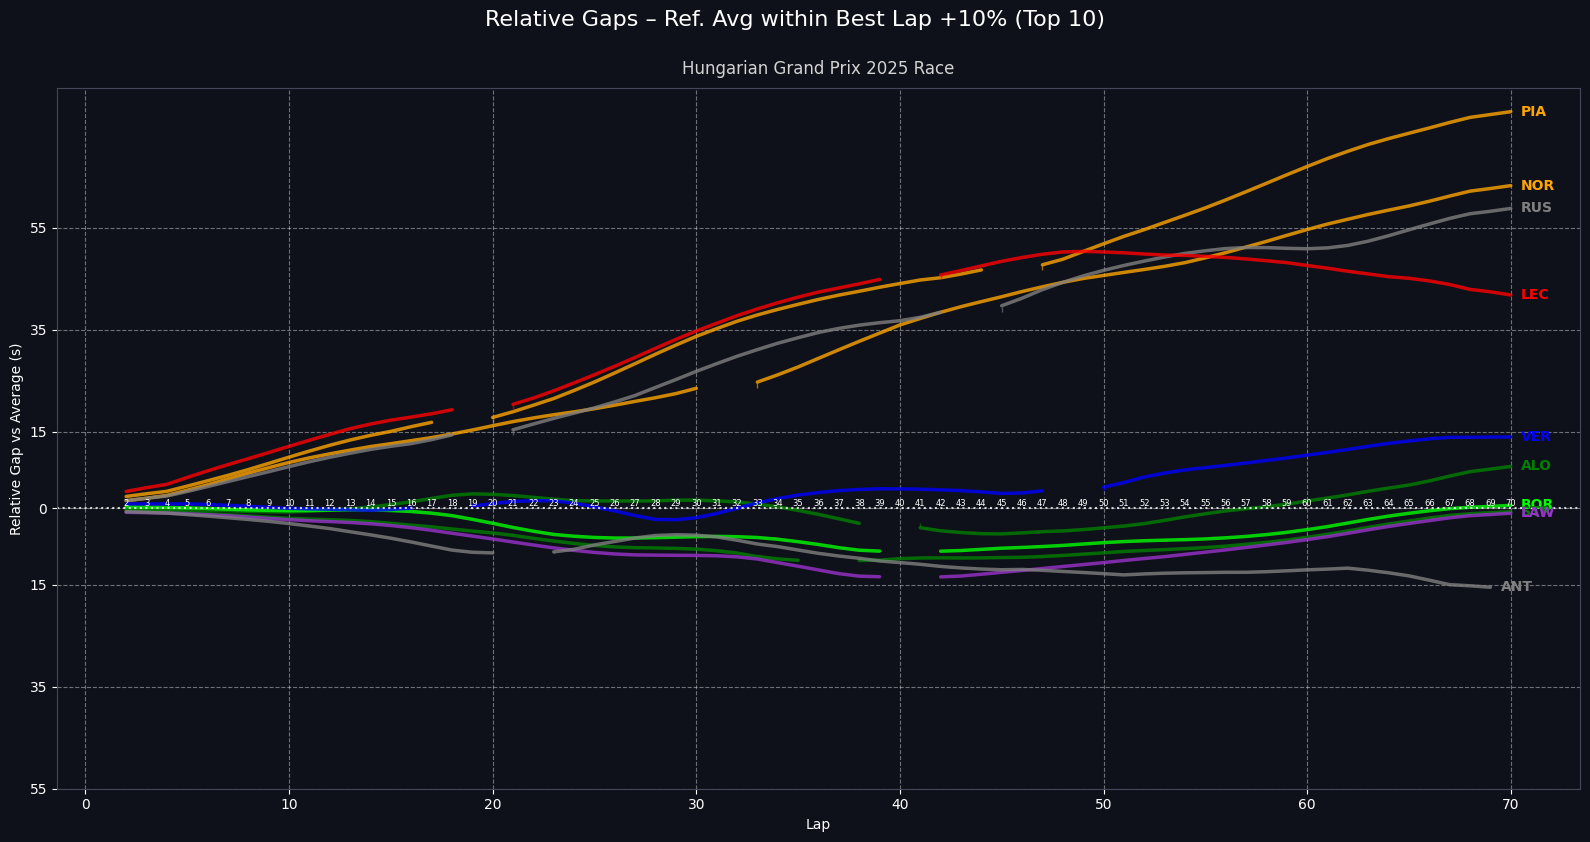

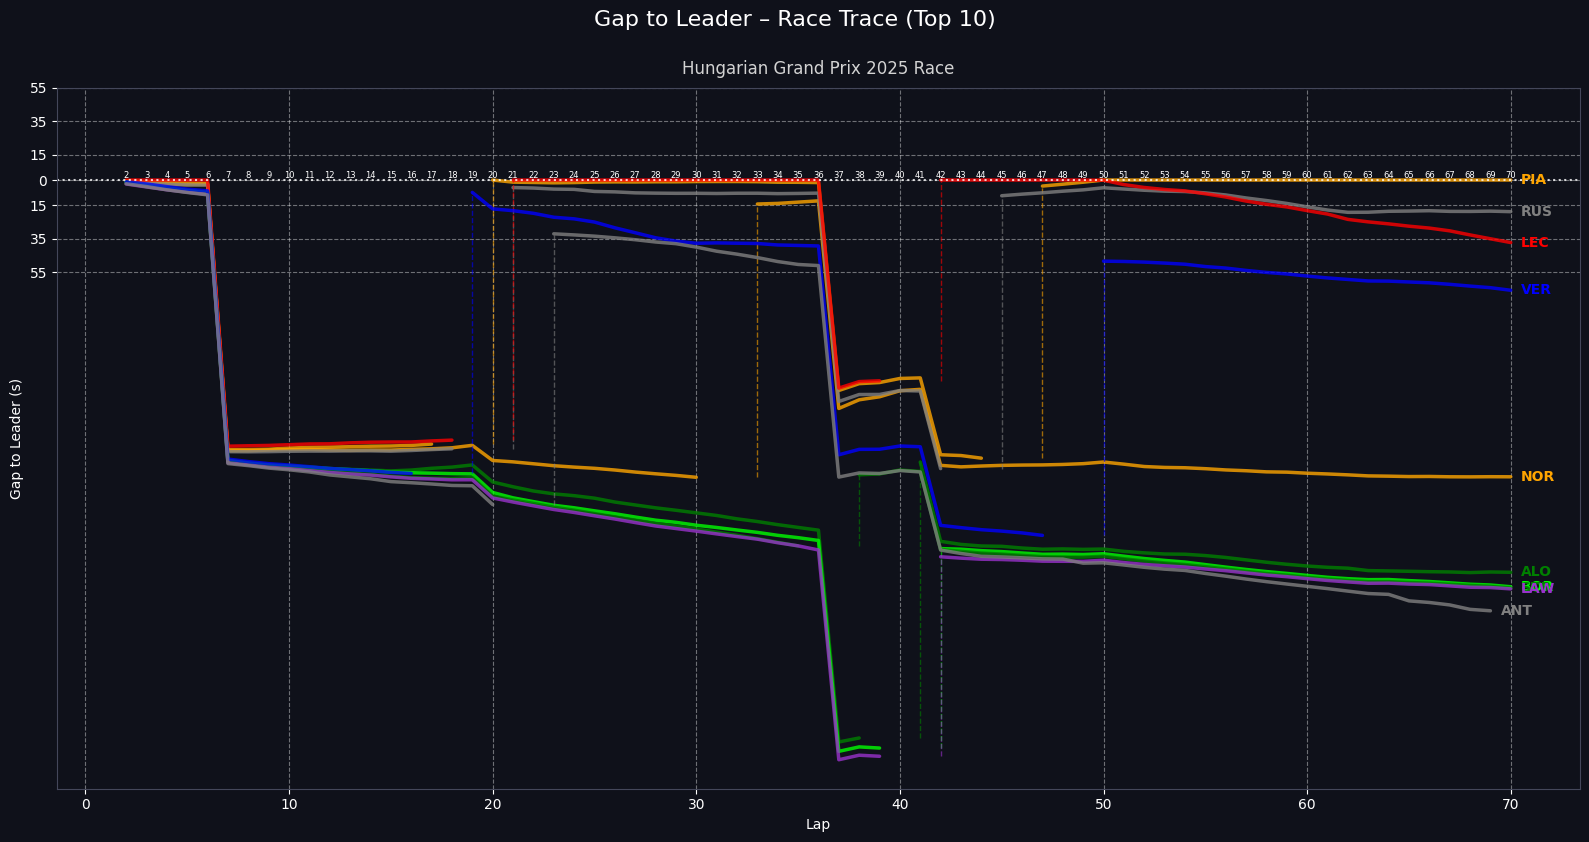

In [44]:
# Delta to Average (FP-style)
plotter = RaceDeltaPlotter(session, transformed_laps, colors)
fig, ax = plotter.plot(
    mode='delta_to_average',
    top_n=True,
    n_top=10,
    title="Relative Gaps – Ref. Avg within Best Lap +10% (Top 10)"
)
plt.show()

# Gap to Leader (Race Trace style)
fig, ax = plotter.plot(
    mode='gap_to_leader',
    top_n=True,
    n_top=10,
    title="Gap to Leader – Race Trace (Top 10)"
)
plt.show()

In [68]:
import warnings
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
#import matplotlib.colors as mcolors

# Replace these with your actual telemetry-framework imports:
# from telemetry import transformed_laps, circuit_info, interpolate_dataframe, session, delta_time

# ignore only the FastF1 deprecation warning about delta_time
warnings.filterwarnings(
    "ignore",
    message="`utils.delta_time` is considered deprecated.*",
    category=FutureWarning
)

class FastestLap:
    """
    Wraps a fastest-lap record and provides convenience accessors.
    Expects lap to have ['Driver','Sector1Time','Sector2Time'] and get_car_data().
    """
    def __init__(self, lap):
        self.name = lap['Driver']
        self.s1_time = lap['Sector1Time']
        self.s2_time = lap['Sector2Time']
        df = lap.get_car_data().add_distance()
        self.df = interpolate_dataframe(df)

    @property
    def sector_distances(self):
        d1 = self.df[self.df['Time'] <= self.s1_time]['Distance'].max()
        d2 = self.df[self.df['Time'] <= (self.s1_time + self.s2_time)]['Distance'].max()
        return d1, d2


def compute_acceleration(df, smooth=True, clip_range=(-6, 6)):
    df = df.copy()
    df['Speed_ms'] = df['Speed'] / 3.6

    df['Distance'] = df['Distance'].interpolate()
    dv_dx = np.gradient(df['Speed_ms'], df['Distance'])

    df['Acc'] = dv_dx * df['Speed_ms']

    if smooth:
        try:
            wl = 27
            if wl >= len(df):
                wl = len(df) - (1 - len(df) % 2)
            if wl >= 3:
                df['Acc'] = savgol_filter(df['Acc'], window_length=wl, polyorder=2)
        except Exception:
            pass

    if clip_range:
        df['Acc'] = df['Acc'].clip(*clip_range)

    return df


def adjust_brightness(color, factor):
    """
    Lighten (factor>1) or darken (factor<1) an RGB color.
    """
    try:
        rgb = np.array(mcolors.to_rgb(color))
        # scale and clip
        adjusted = np.clip(rgb * factor, 0, 1)
        return mcolors.to_hex(adjusted)
    except Exception:
        return color  # fallback


def assign_colors(driver_specs, driver_color_map=None, default_colors=None, fallback_shades=None):
    """
    Returns a list of colors for each spec in driver_specs (order preserved).
    Priority: driver_color_map[display_name] > driver_color_map[driver] > default_colors[driver] > 'white'
    Applies fallback shades when base color repeats; if exhausted, auto-adjust brightness.
    """
    if default_colors is None:
        default_colors = {}
    if fallback_shades is None:
        fallback_shades = {
            'red': ['white', 'lightcoral'],
            'blue': ['cyan', 'lightblue'],
            'orange': ['white', 'wheat'],
            'grey': ['white', 'silver'],
            'green': ['lime', 'springgreen'],
            'pink': ['violet', 'lightpink'],
            'olive': ['khaki'],
            'navy': ['skyblue'],
            '#9932CC': ['plum'],
            'lime': ['yellowgreen']
        }

    used = {}
    palette = []
    for spec in driver_specs:
        driver = spec['driver']
        display = spec['display_name']

        # Determine base color
        base_color = None
        if driver_color_map:
            base_color = driver_color_map.get(display, driver_color_map.get(driver))
        if base_color is None:
            base_color = default_colors.get(driver, 'white')

        count = used.get(base_color, 0)
        if count == 0:
            color = base_color
        else:
            # try fallback shades first
            alternates = fallback_shades.get(base_color, [])
            if count - 1 < len(alternates):
                color = alternates[count - 1]
            else:
                # auto adjust brightness for further duplicates
                # alternate lighten/darken
                factor = 1 + 0.2 * ((count - len(alternates)) % 2) * (1 if ((count - len(alternates)) // 2) % 2 == 0 else -1)
                color = adjust_brightness(base_color, factor)
        used[base_color] = count + 1
        palette.append(color)

    return palette


def compare_laps(drivers, channels=None, session_label="", driver_color_map=None):
    """
    Compare up to three laps (can be from the same or different drivers).

    Parameters:
    - drivers: flexible specification:
        * dict like {'LEC': 'fastest', 'VER': 5}
        * dict where value is list: {'LEC': ['fastest', 4]} to get two LEC laps
        * list of strings: ['VER', 'LEC'] (fastest laps)
        * list of tuples: [('VER', 12), ('VER', 'fastest')]
        * mix of above
    - channels: list of telemetry fields to plot (can include 'Delta', 'Δ', etc.)
    - session_label: optional label for title
    - driver_color_map: optional override; keys can be driver codes or display names like "LEC_4"
    """
    # Normalize into driver_specs
    driver_specs = []  # each: {'driver':..., 'lap':..., 'display_name':...}
    if isinstance(drivers, dict):
        for drv, lap_sel in drivers.items():
            if isinstance(lap_sel, (list, tuple)):
                for sel in lap_sel:
                    if sel == 'fastest':
                        name = drv
                    else:
                        name = f"{drv}_{sel}"
                    driver_specs.append({'driver': drv, 'lap': sel, 'display_name': name})
            else:
                name = drv if lap_sel == 'fastest' else f"{drv}_{lap_sel}"
                driver_specs.append({'driver': drv, 'lap': lap_sel, 'display_name': name})
    elif isinstance(drivers, (list, tuple)):
        for entry in drivers:
            if isinstance(entry, str):
                driver_specs.append({'driver': entry, 'lap': 'fastest', 'display_name': entry})
            elif isinstance(entry, (list, tuple)) and len(entry) == 2:
                drv, lap_sel = entry
                if lap_sel == 'fastest':
                    name = drv
                else:
                    name = f"{drv}_{lap_sel}"
                driver_specs.append({'driver': drv, 'lap': lap_sel, 'display_name': name})
            elif isinstance(entry, dict):
                if len(entry) != 1:
                    raise ValueError(f"Invalid driver dict entry: {entry}")
                drv, lap_sel = next(iter(entry.items()))
                name = drv if lap_sel == 'fastest' else f"{drv}_{lap_sel}"
                driver_specs.append({'driver': drv, 'lap': lap_sel, 'display_name': name})
            else:
                raise ValueError(f"Unsupported driver entry: {entry}")
    else:
        raise ValueError("drivers must be dict, list, or tuple of supported specs.")

    if not (1 <= len(driver_specs) <= 3):
        raise ValueError("Must compare between 1 and 3 laps/drivers.")

    driver_codes = [spec['driver'] for spec in driver_specs]
    lap_selections = [spec['lap'] for spec in driver_specs]
    display_names = [spec['display_name'] for spec in driver_specs]

    default_channels = ['Speed', 'Throttle', 'Brake', 'RPM', 'nGear', 'Acc']
    user_provided_channels = channels is not None
    channels = channels or default_channels

    delta_aliases = {'delta', 'deltatime', 'Δ'}
    wants_delta = (
        len(driver_specs) > 1 and
        (not user_provided_channels or any(str(ch).lower() in delta_aliases for ch in channels))
    )
    channels = [ch for ch in channels if str(ch).lower() not in delta_aliases]
    effective_channels = channels.copy()
    if not user_provided_channels and 'Acc' not in effective_channels:
        effective_channels.append('Acc')

    units = {
        'Speed': 'km/h',
        'Throttle': '%',
        'Brake': '%',
        'RPM': 'rpm',
        'nGear': '',
        'DRS': '',
        'Acc': 'm/s²',
    }

    # Load data
    laps = []
    lap_objs = []
    for driver, lap_id in zip(driver_codes, lap_selections):
        if lap_id == 'fastest':
            lap = transformed_laps.pick_drivers(driver).pick_fastest()
        else:
            try:
                lap = transformed_laps.pick_drivers(driver).pick_laps(int(lap_id)).iloc[0]
            except Exception as e:
                raise ValueError(f"Invalid lap selection for {driver}: {lap_id}") from e

        fl = FastestLap(lap)
        fl.df = compute_acceleration(fl.df)
        laps.append(fl)
        lap_objs.append(lap)

    avg_air_temp = weather['AirTemp'].mean()
    avg_track_temp = weather['TrackTemp'].mean()

    lap_times = [lap['LapTime'].total_seconds() for lap in lap_objs]
    baseline_idx = lap_times.index(min(lap_times))
    baseline_name = display_names[baseline_idx]

    s1_dist, s2_dist = laps[baseline_idx].sector_distances
    corner_df = circuit_info.corners.copy().sort_values('Distance')

    # Color assignment
    palette = assign_colors(
        driver_specs,
        driver_color_map=driver_color_map,
        default_colors=globals().get('colors', None)
    )

    # Plot setup
    n_plots = len(effective_channels) + (1 if wants_delta else 0)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 3.5 * n_plots), sharex=True)
    if n_plots == 1:
        axes = [axes]
    plt.style.use('dark_background')

    plot_idx = 0
    for ch in effective_channels:
        ax = axes[plot_idx]
        if ch not in laps[baseline_idx].df.columns:
            ax.set_visible(False)
            plot_idx += 1
            continue
        for lap, col, disp_name in zip(laps, palette, display_names):
            ax.plot(lap.df['Distance'], lap.df.get(ch, np.nan),
                    color=col, linestyle='-', label=f"{disp_name} {ch}")
        unit = units.get(ch, '')
        ax.set_ylabel(f"{ch} ({unit})" if unit else ch, color='white')
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.tick_params(colors='white')
        ax.axvline(s1_dist, color='white', linestyle='--')
        ax.axvline(s2_dist, color='white', linestyle='--')

        zero_based = corner_df['Number'].min() == 0
        for _, row in corner_df.iterrows():
            num = int(row['Number']) + (1 if zero_based else 0)
            letter = ''
            if 'Letter' in row and pd.notna(row['Letter']) and str(row['Letter']).strip():
                letter = str(row['Letter']).strip()
            label = f"{num}{letter}"
            ax.text(row['Distance'], ax.get_ylim()[0], label,
                    color='white', fontsize=8, ha='center', va='bottom')
        plot_idx += 1

    if wants_delta:
        ax_dt = axes[-1]
        ref_lap = lap_objs[baseline_idx]
        for idx, comp_lap in enumerate(lap_objs):
            if idx == baseline_idx:
                continue
            delta_series, ref_tel, comp_tel = delta_time(ref_lap, comp_lap)
            ax_dt.plot(ref_tel['Distance'], delta_series,
                       color=palette[idx], linestyle='-',
                       label=f"Δ ({display_names[idx]} - {baseline_name})")
        ax_dt.set_ylabel('Δ Time (s)', color='white')
        ax_dt.axhline(0, color='white', linestyle='--')
        ax_dt.grid(True, linestyle='--', linewidth=0.5)
        ax_dt.tick_params(colors='white')
        ax_dt.set_xlabel('Distance (m)', color='white')
        ax_dt.xaxis.set_major_locator(plt.MultipleLocator(500))
        ax_dt.xaxis.set_minor_locator(plt.MultipleLocator(100))
        ax_dt.legend(loc='upper right', title=f"Benchmark: {baseline_name}")

    # Annotations
    labels = []
    for i, (name, secs) in enumerate(zip(display_names, lap_times)):
        if pd.isna(secs):
            label = f"{name}: NaN"
        else:
            mins = int(secs // 60)
            rem = secs - mins * 60
            label = f"{name}: {mins}:{rem:06.3f}"
            if i == baseline_idx:
                label += f"   AIR: {avg_air_temp:.1f}°C  TRACK: {avg_track_temp:.1f}°C"
        labels.append(label)

    fig.text(0.02, 0.98, "\n".join(labels), ha='left', va='top',
             color='white', fontsize=10,
             bbox=dict(facecolor='black', alpha=0.5, pad=4))

    fig.text(0.9, 0.96, "Provided by: Pietro Paolo Melella",
             ha='right', va='bottom', color='white', fontsize=15)
    title = (f"{session.event['EventName']} {session.event.year} {session_label}"
             if session_label else f"{session.event['EventName']} {session.event.year}")
    fig.suptitle(title, color='white')
    fig.subplots_adjust(top=0.92)
    plt.tight_layout(rect=[0, 0, 0.90, 0.97])
    sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
    logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

    if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.80, 0.915, 0.06, 0.06], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
    else:
            print(f"[WARN] Logo file not found at: {logo_path}")

    plt.show()

In [75]:
display(transformed_laps.pick_drivers('LEC').query("Stint == 1.0"))

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s)
197,0 days 01:00:38.443000,LEC,16,0 days 00:01:22.829000,2.0,1.0,NaT,NaT,0 days 00:00:30.160000,0 days 00:00:29.384000,...,Ferrari,0 days 00:59:15.614000,2025-08-03 13:04:33.708,1,1.0,False,,False,True,82.829
198,0 days 01:02:00.938000,LEC,16,0 days 00:01:22.495000,3.0,1.0,NaT,NaT,0 days 00:00:29.770000,0 days 00:00:29.427000,...,Ferrari,0 days 01:00:38.443000,2025-08-03 13:05:56.537,1,1.0,False,,False,True,82.495
199,0 days 01:03:23.216000,LEC,16,0 days 00:01:22.278000,4.0,1.0,NaT,NaT,0 days 00:00:29.755000,0 days 00:00:29.340000,...,Ferrari,0 days 01:02:00.938000,2025-08-03 13:07:19.032,1,1.0,False,,False,True,82.278
200,0 days 01:04:45.534000,LEC,16,0 days 00:01:22.318000,5.0,1.0,NaT,NaT,0 days 00:00:29.618000,0 days 00:00:29.300000,...,Ferrari,0 days 01:03:23.216000,2025-08-03 13:08:41.310,1,1.0,False,,False,True,82.318
201,0 days 01:06:07.891000,LEC,16,0 days 00:01:22.357000,6.0,1.0,NaT,NaT,0 days 00:00:29.666000,0 days 00:00:29.403000,...,Ferrari,0 days 01:04:45.534000,2025-08-03 13:10:03.628,1,1.0,False,,False,True,82.357
202,0 days 01:07:29.937000,LEC,16,0 days 00:01:22.046000,7.0,1.0,NaT,NaT,0 days 00:00:29.640000,0 days 00:00:29.277000,...,Ferrari,0 days 01:06:07.891000,2025-08-03 13:11:25.985,1,1.0,False,,False,True,82.046
203,0 days 01:08:51.677000,LEC,16,0 days 00:01:21.740000,8.0,1.0,NaT,NaT,0 days 00:00:29.561000,0 days 00:00:29.076000,...,Ferrari,0 days 01:07:29.937000,2025-08-03 13:12:48.031,1,1.0,False,,False,True,81.740
204,0 days 01:10:13.499000,LEC,16,0 days 00:01:21.822000,9.0,1.0,NaT,NaT,0 days 00:00:29.647000,0 days 00:00:29.130000,...,Ferrari,0 days 01:08:51.677000,2025-08-03 13:14:09.771,1,1.0,False,,False,True,81.822
205,0 days 01:11:35.443000,LEC,16,0 days 00:01:21.944000,10.0,1.0,NaT,NaT,0 days 00:00:29.741000,0 days 00:00:29.201000,...,Ferrari,0 days 01:10:13.499000,2025-08-03 13:15:31.593,1,1.0,False,,False,True,81.944
206,0 days 01:12:57.285000,LEC,16,0 days 00:01:21.842000,11.0,1.0,NaT,NaT,0 days 00:00:29.639000,0 days 00:00:29.156000,...,Ferrari,0 days 01:11:35.443000,2025-08-03 13:16:53.537,1,1.0,False,,False,True,81.842


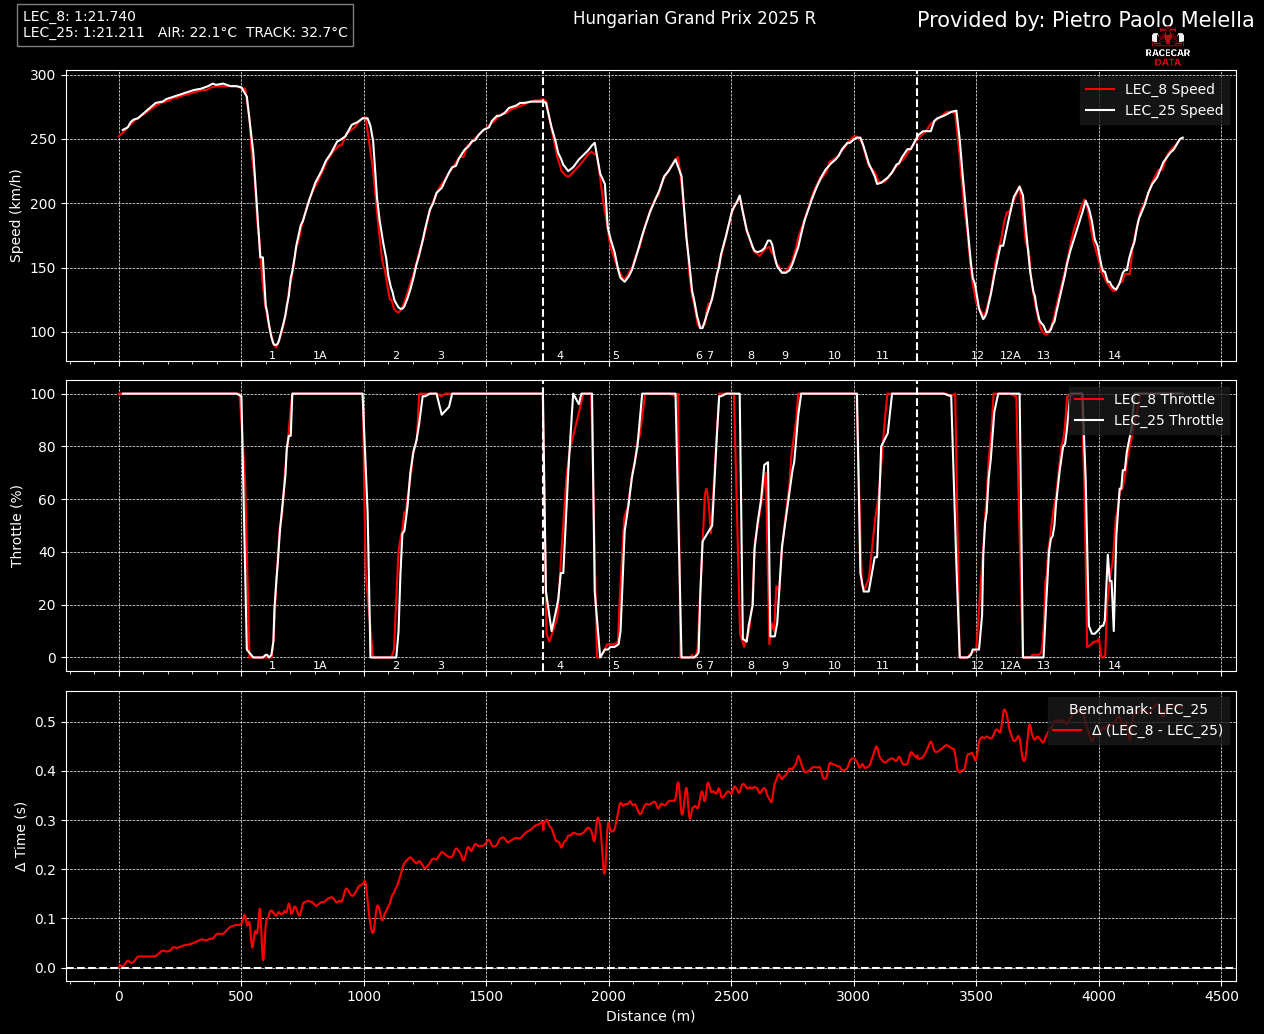

In [84]:
compare_laps({"LEC":[8,25]}, channels=['Speed', 'Throttle','Delta'], session_label="R")
